# Check all features than they correspond

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import plot_set
import os
seed = tf.random.set_seed(1)
#import ROOT as R
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:


df_atlas = pd.read_hdf("/storage/shared/data/2lep_df_forML_data_fromRDF.hdf5")
df = pd.read_hdf("/storage/shared/data/2lep_df_forML_bkg_signal_fromRDF.hdf5")


In [3]:
df.info()
df_atlas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109683372 entries, 0 to 109683371
Data columns (total 39 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   njet20                     int32  
 1   njet60                     int32  
 2   nbjet60                    int32  
 3   nbjet70                    int32  
 4   nbjet77                    int32  
 5   nbjet85                    int32  
 6   isOS                       int32  
 7   isSF                       int32  
 8   mll                        float32
 9   mt2                        float32
 10  met_et                     float32
 11  met_phi                    float32
 12  lep1_flav                  int32  
 13  lep1_pt                    float32
 14  lep1_eta                   float32
 15  lep1_phi                   float32
 16  lep1_E                     float32
 17  lep1_ptcone30              float32
 18  lep1_etcone20              float32
 19  lep1_trackd0pvunbiased     float32
 20

In [4]:
df["category"].unique()

array(['Zjetsincl', 'Zjets', 'Diboson', 'Higgs', 'singleTop', 'topX',
       'RS_G_ZZ', 'SUSYC1N2', 'Wjets', 'SUSYC1C1', 'dmV_Zll', 'ttbar',
       'GG_ttn1', 'ZPrimett', 'Gee', 'SUSYSlepSlep', 'ZPrimeee',
       'ZPrimemumu', 'Wjetsincl', 'Gmumu', 'TT_directTT'], dtype=object)

In [5]:
signals = ['ZPrimemumu', 'SUSYC1C1', 'RS_G_ZZ', 'SUSYSlepSlep', 'SUSYC1N2', 'ZPrimett', 'ZPrimeee', 'dmV_Zll', 'GG_ttn1', 'TT_directTT', 'Gee', 'Gmumu']
issignal = np.where(df["category"].isin(signals)  , 1, 0)
df = df.assign(isSignal=issignal)

### Data separation

In [7]:
zjetsinl_idx = df[df["category"] == "Zjetsincl"].index
wjetsinl_idx = df[df["category"] == "Wjetsincl"].index
df.drop(zjetsinl_idx ,inplace=True)
df.drop(wjetsinl_idx ,inplace=True)

In [8]:
categories = df["category"]

background_categories = df[df["isSignal"] == 0]["category"].unique()
signal_df = df[df['category'] == 'SUSYC1C1']

background_df = df[df["isSignal"] == 0]

columns_to_drop = ["category", "isSignal", "physdescr"]


signal_df.drop(columns_to_drop, axis=1, inplace=True)
background_df.drop(columns_to_drop, axis=1, inplace=True)


signal_mc = signal_df#.to_numpy()
background_mc = background_df#.to_numpy()

data = df_atlas

/storage/software/easybuild/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Plot features

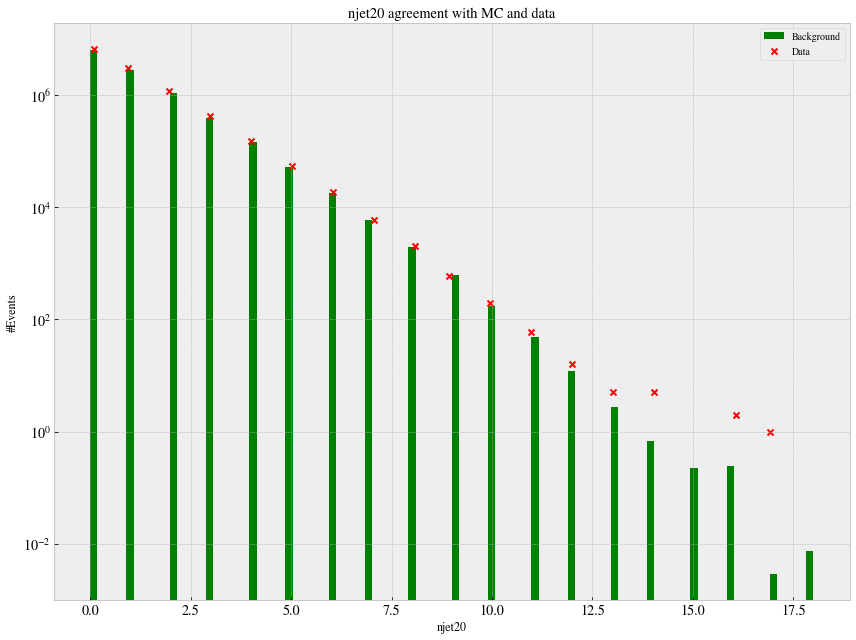

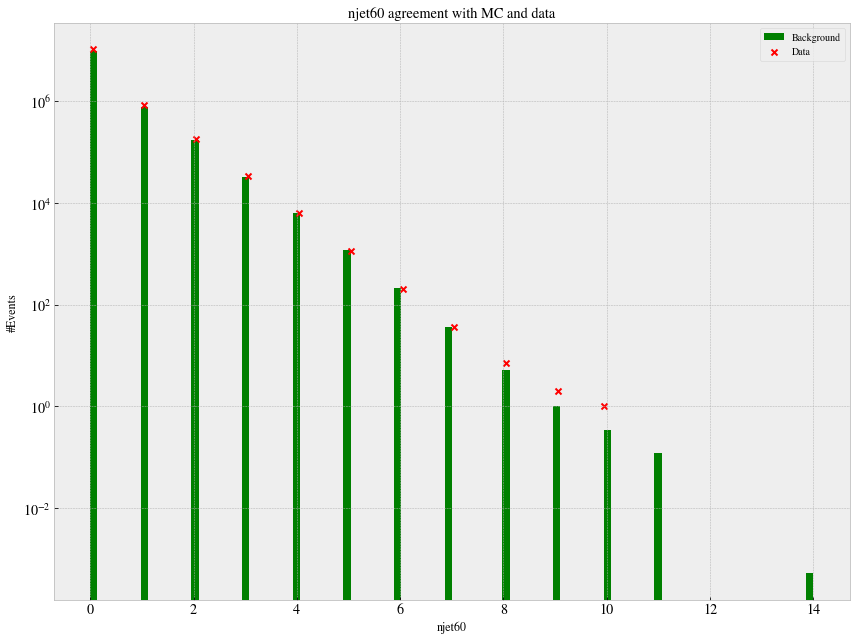

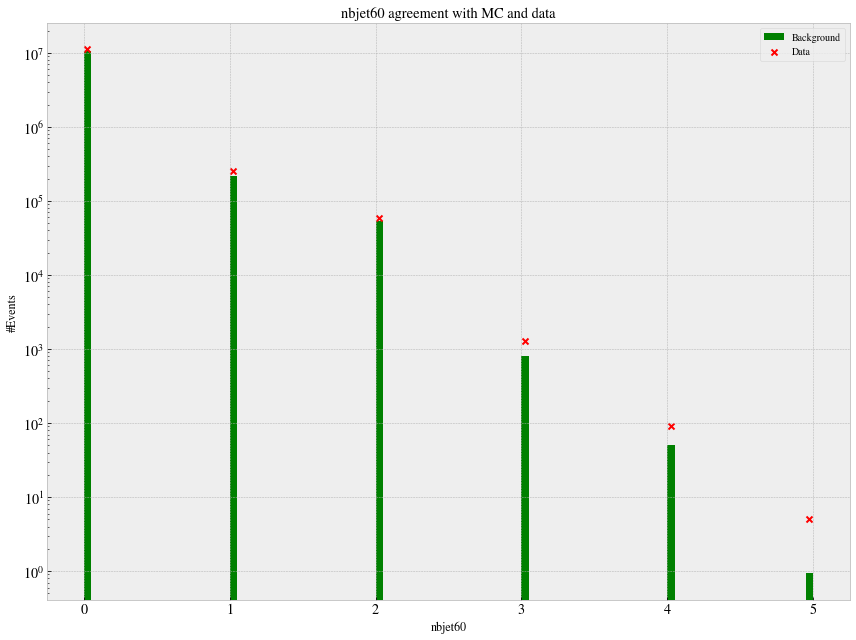

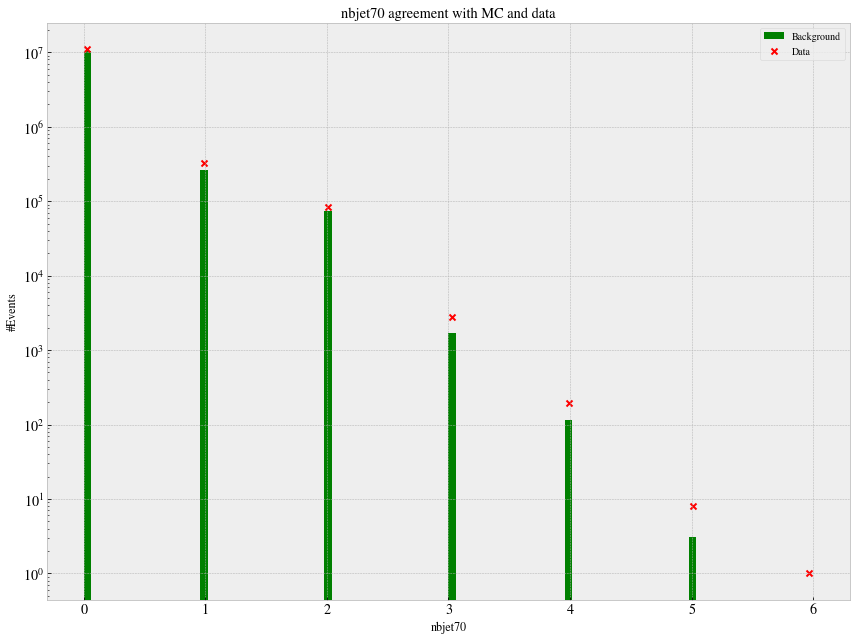

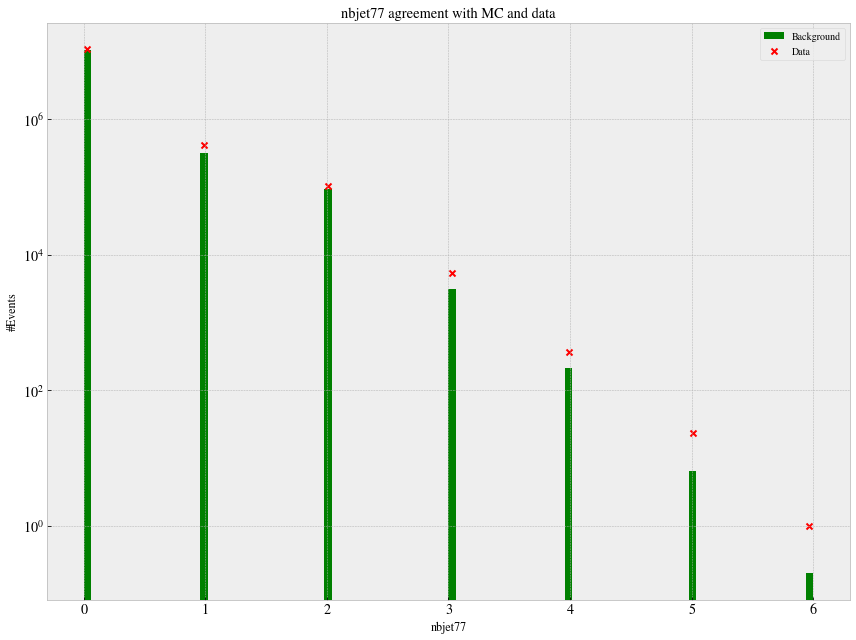

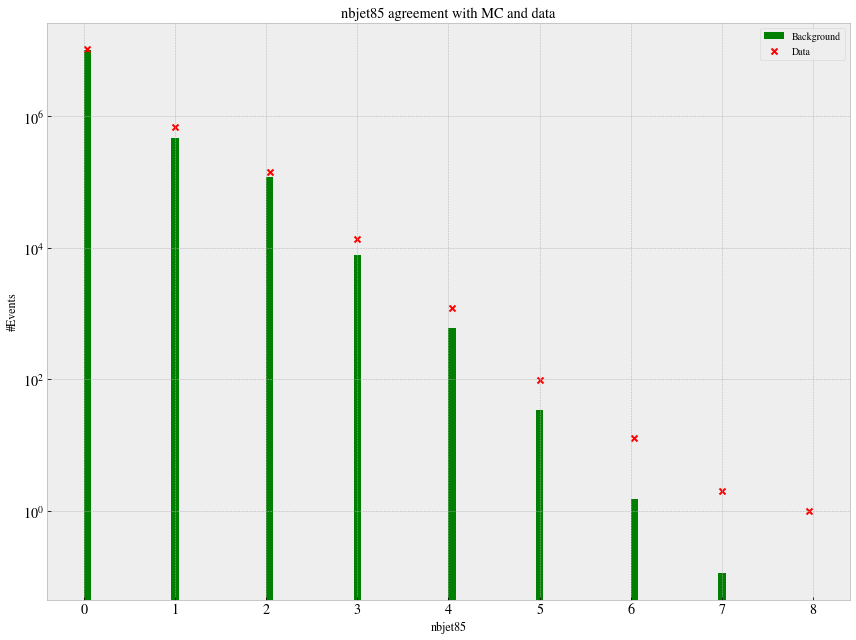

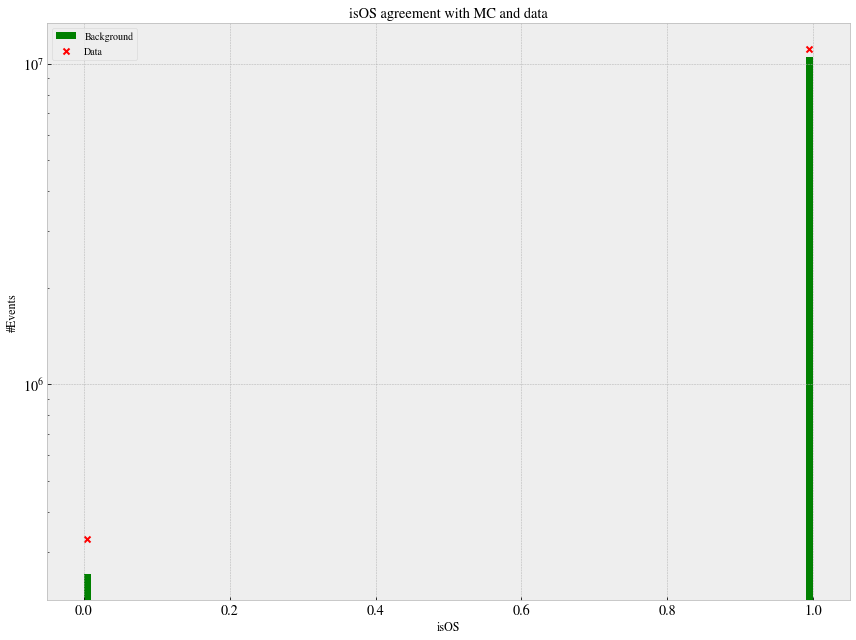

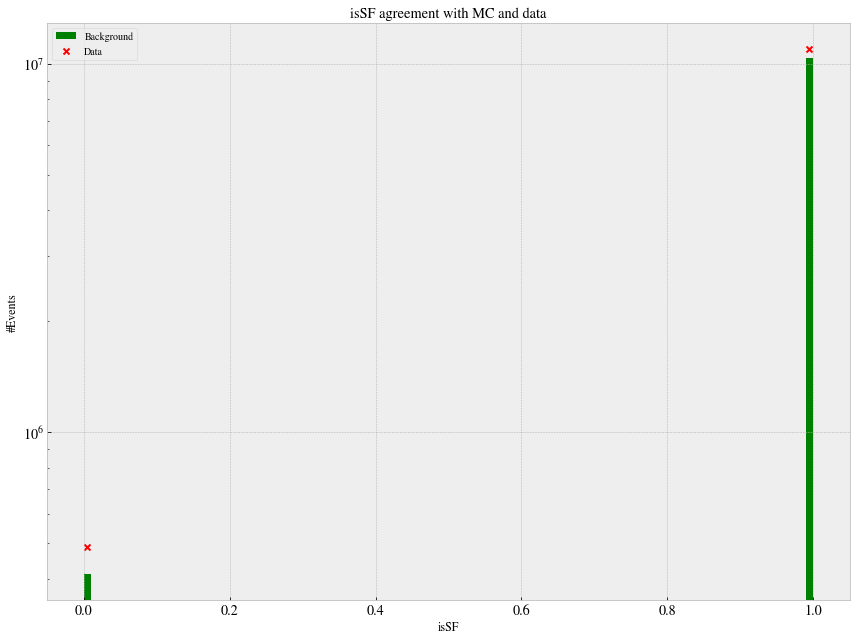

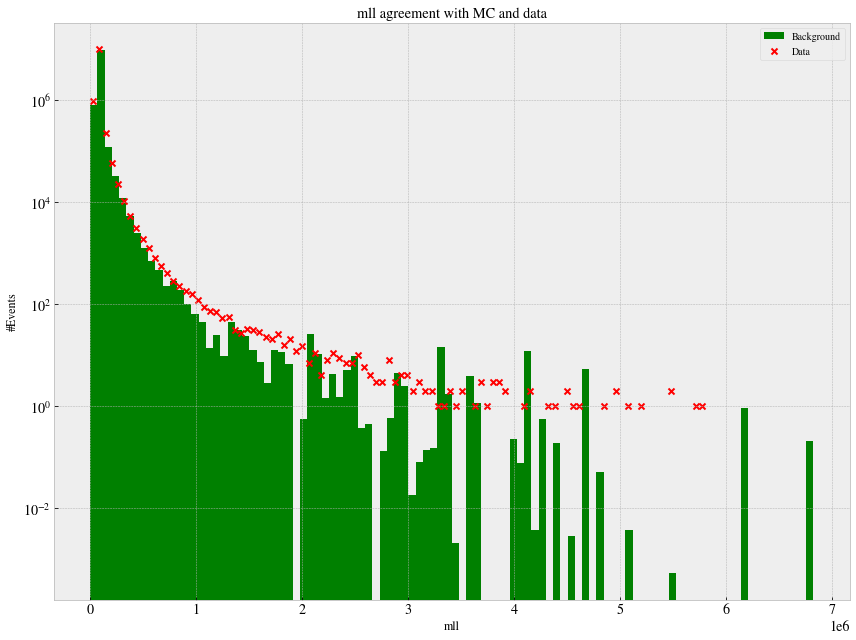

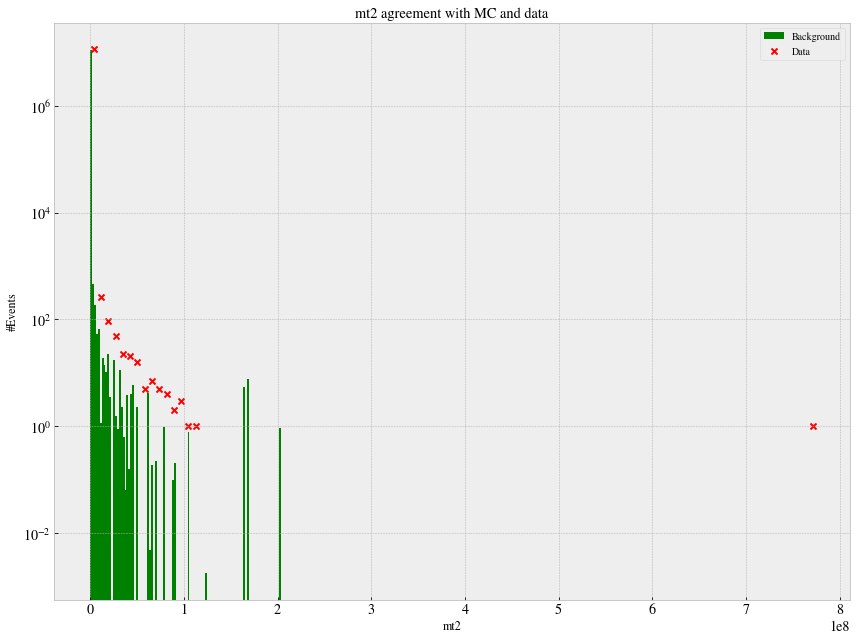

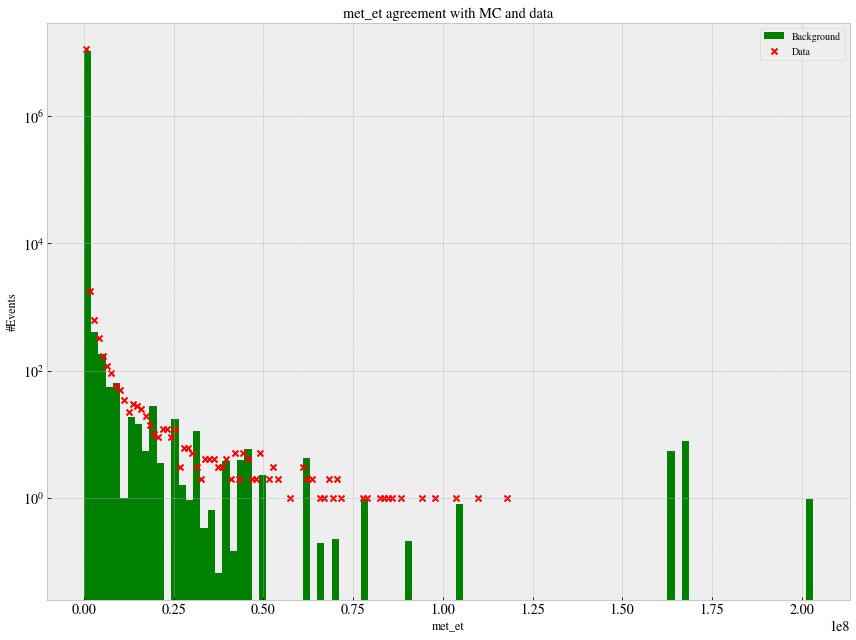

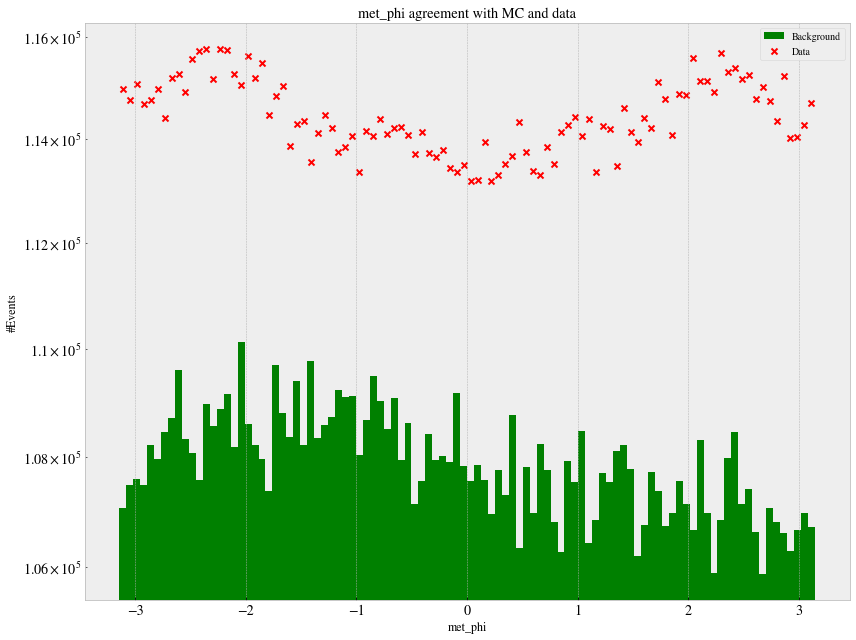

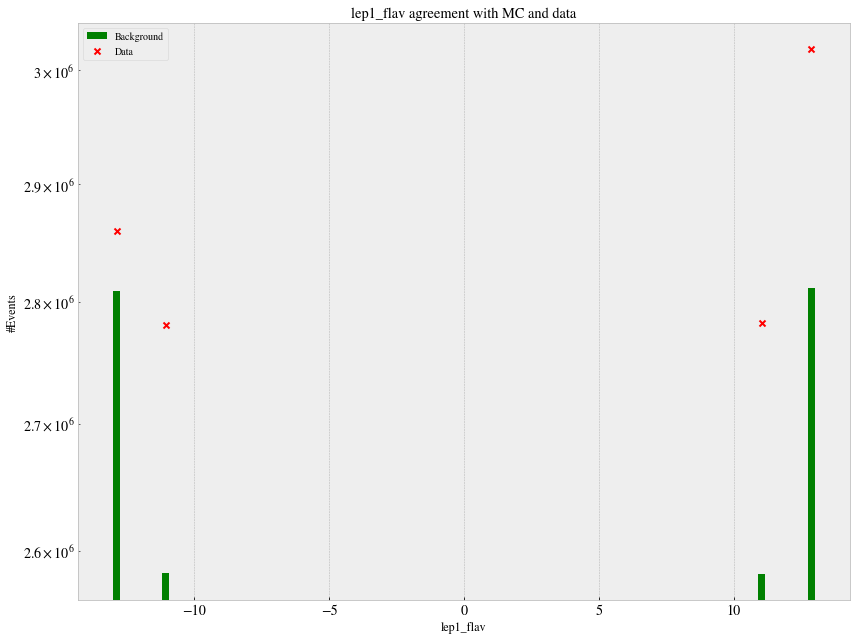

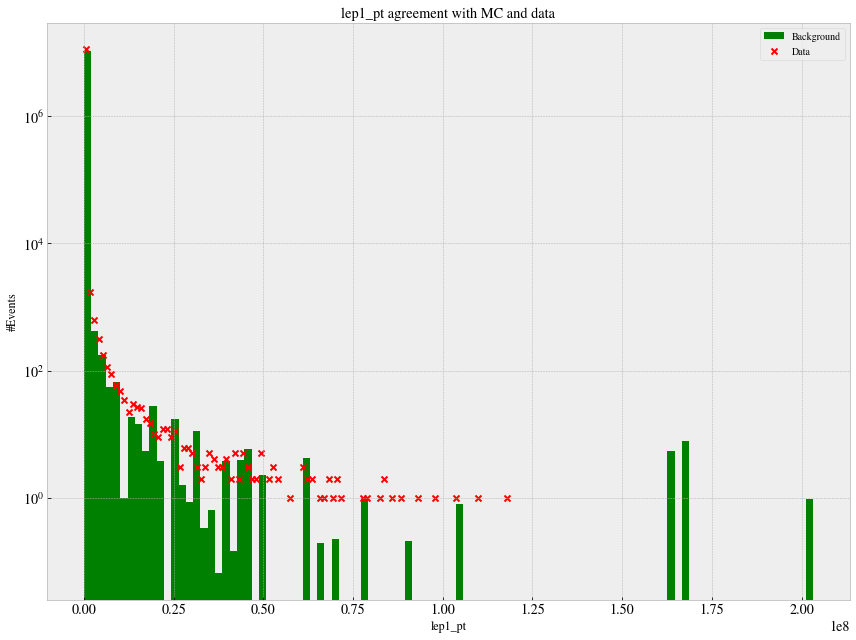

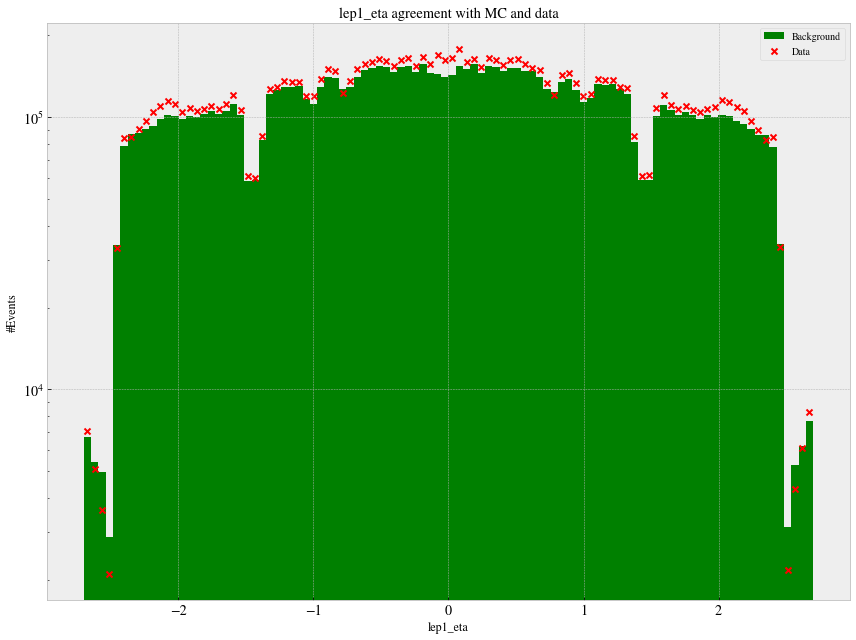

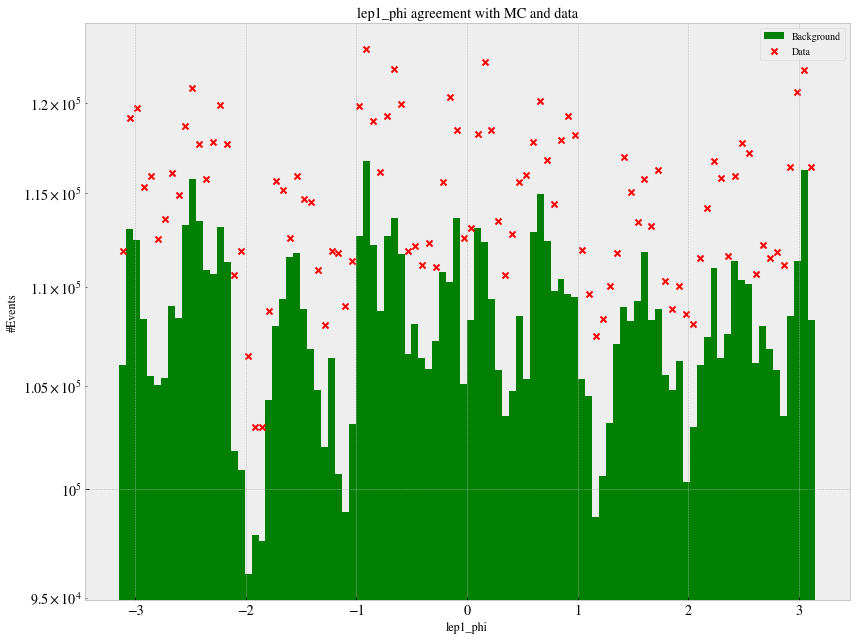

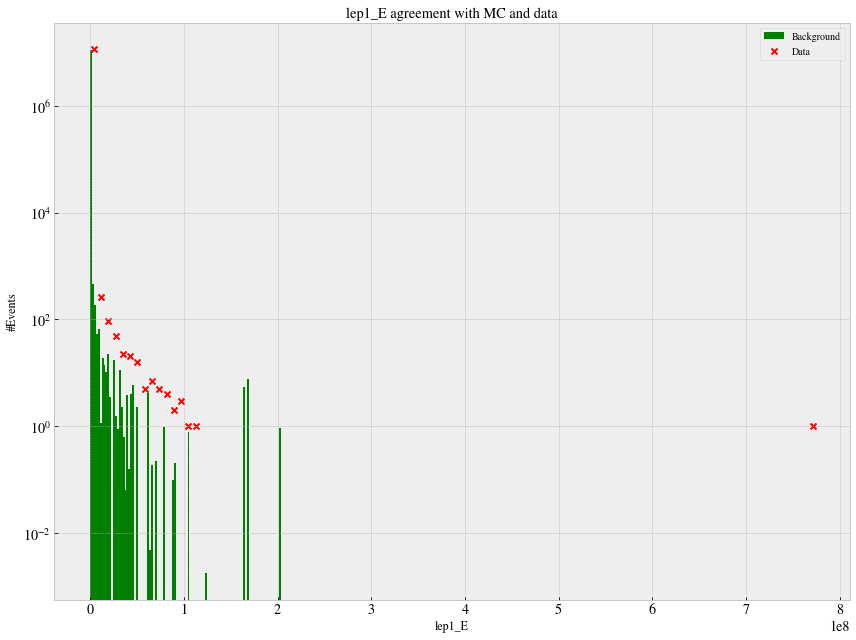

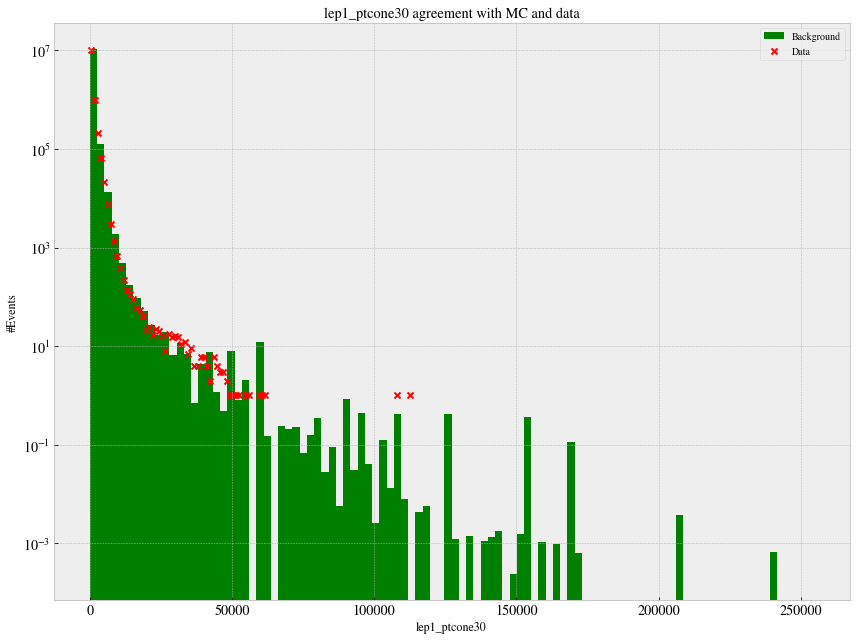

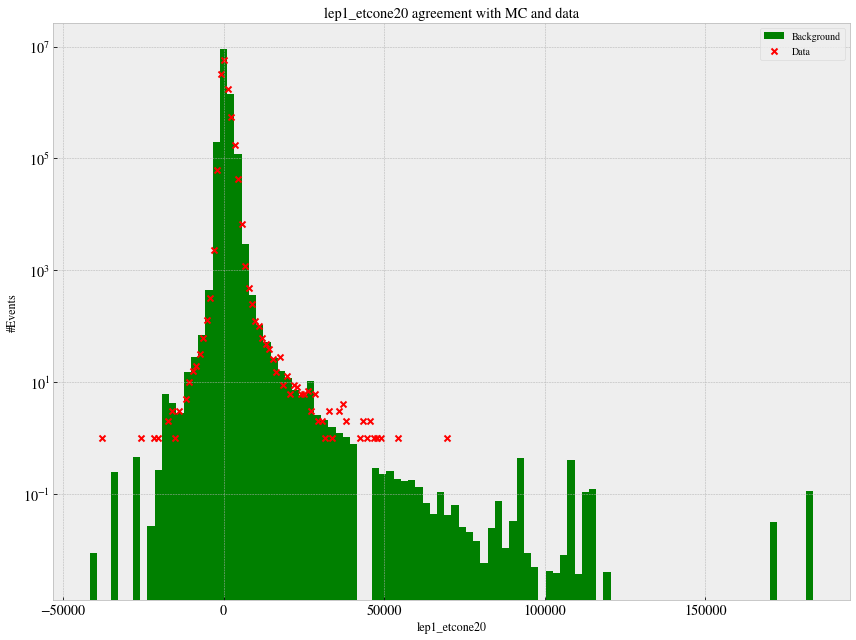

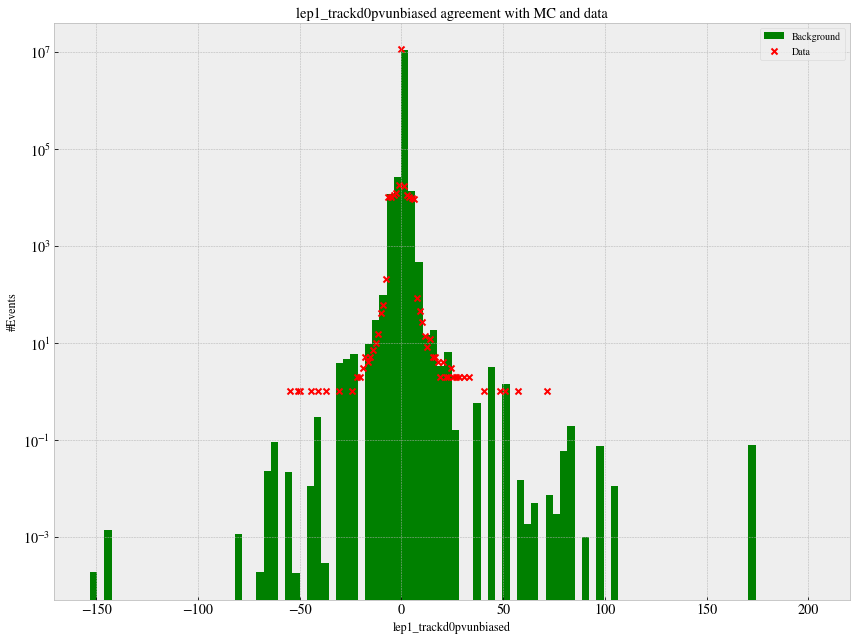

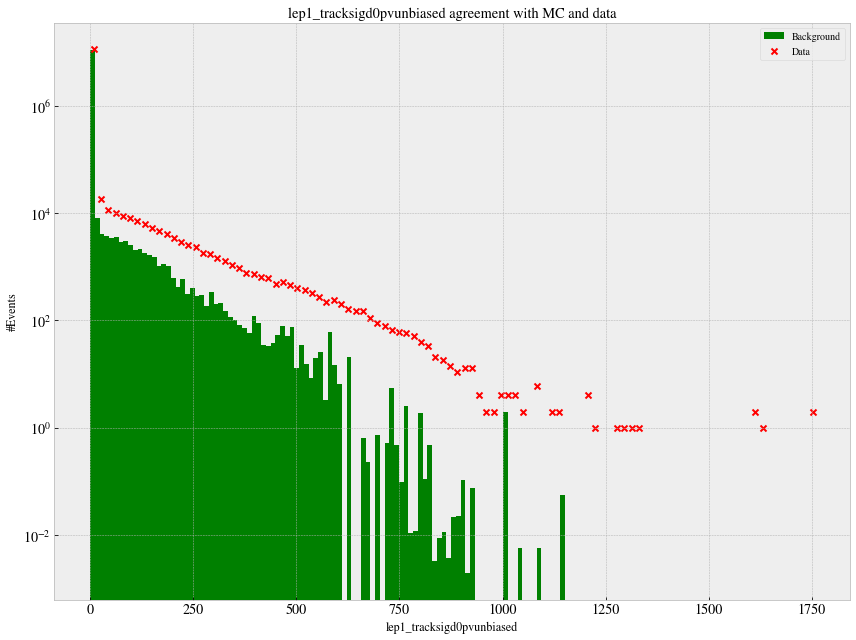

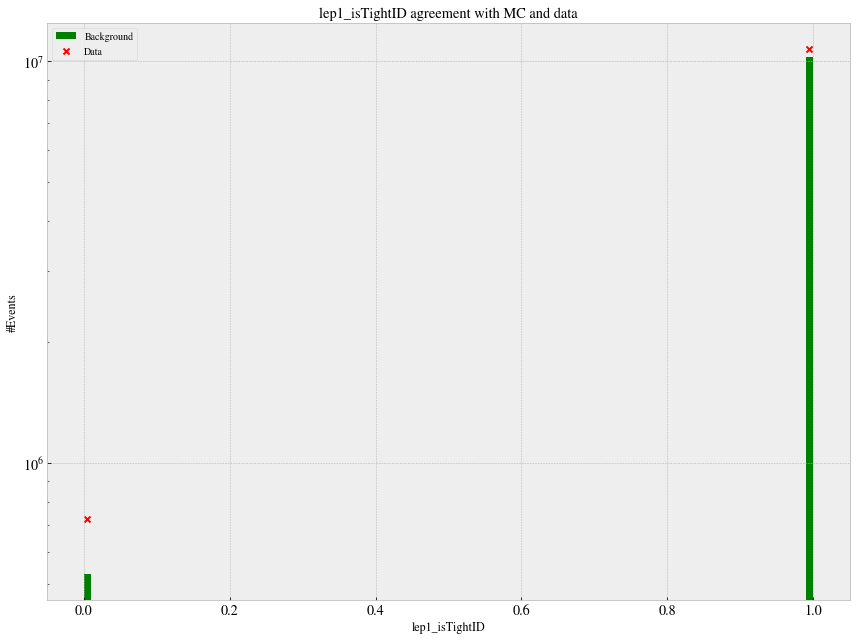

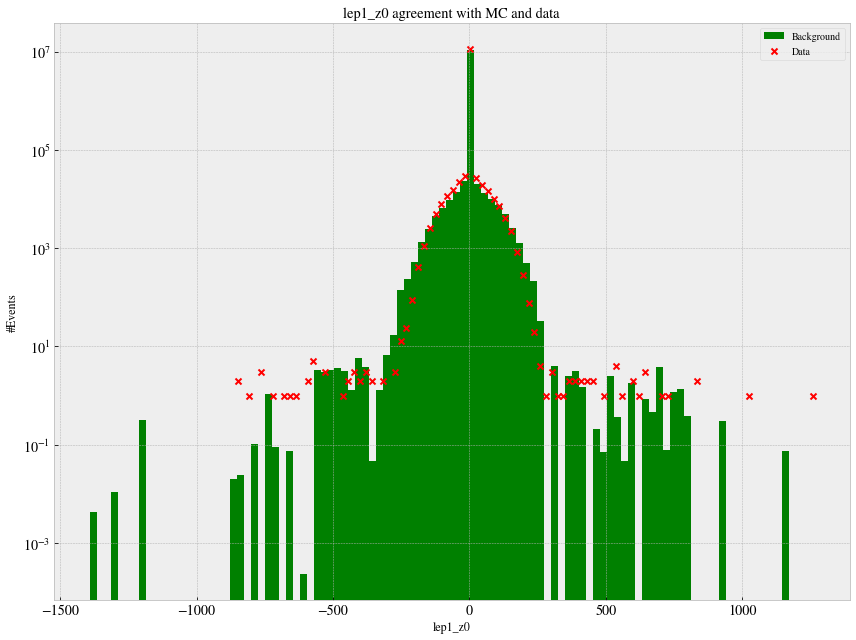

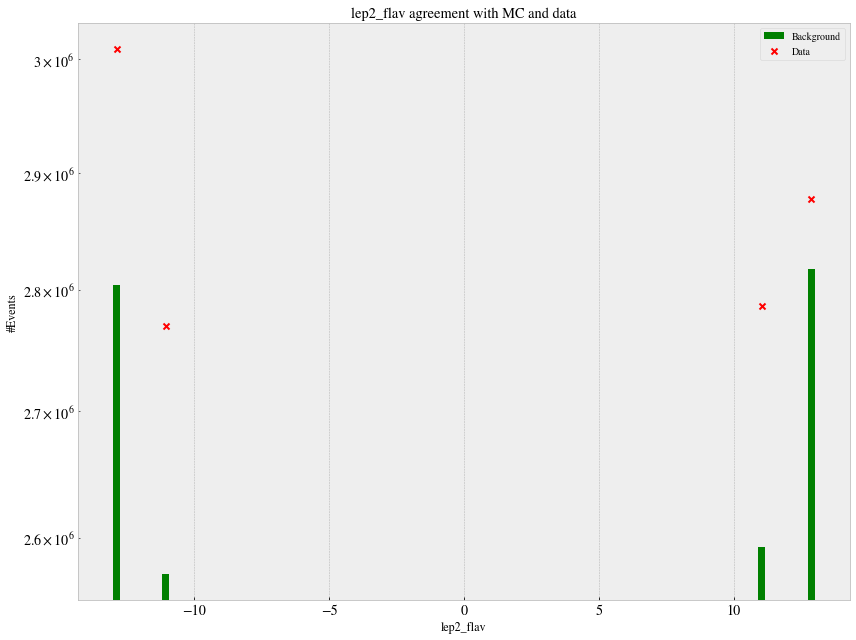

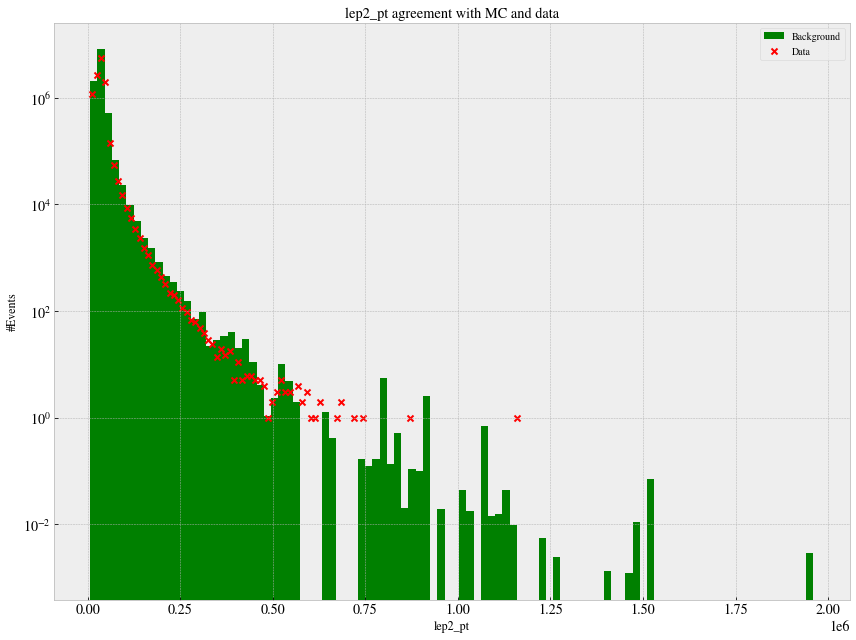

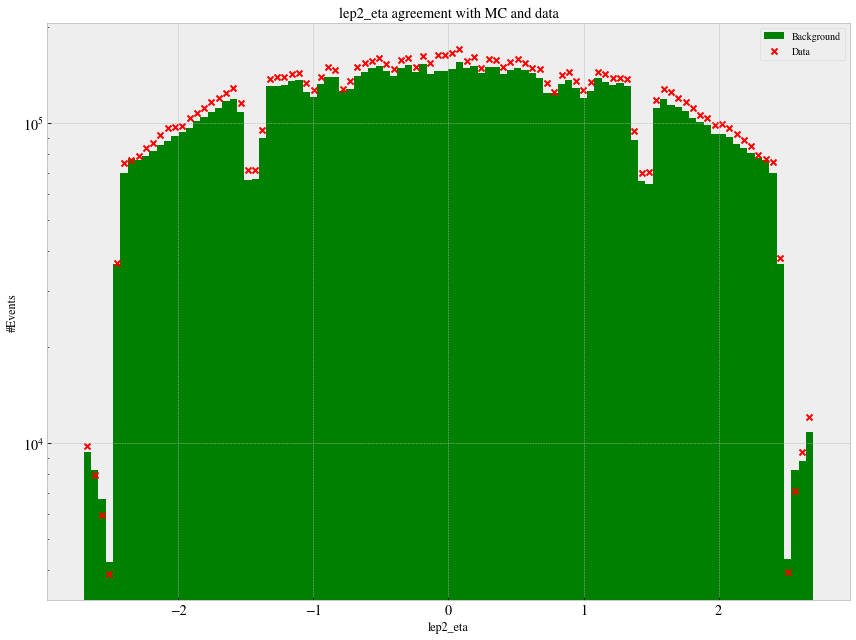

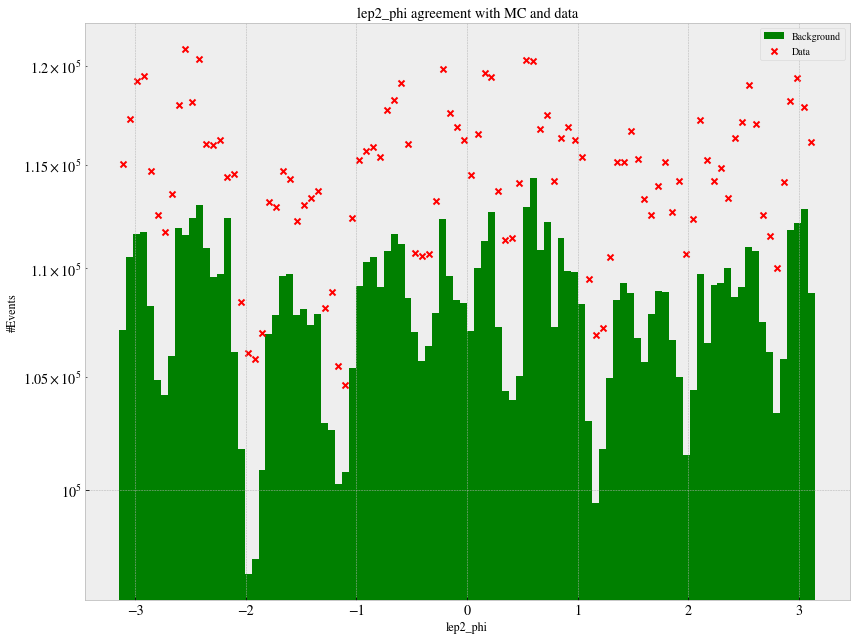

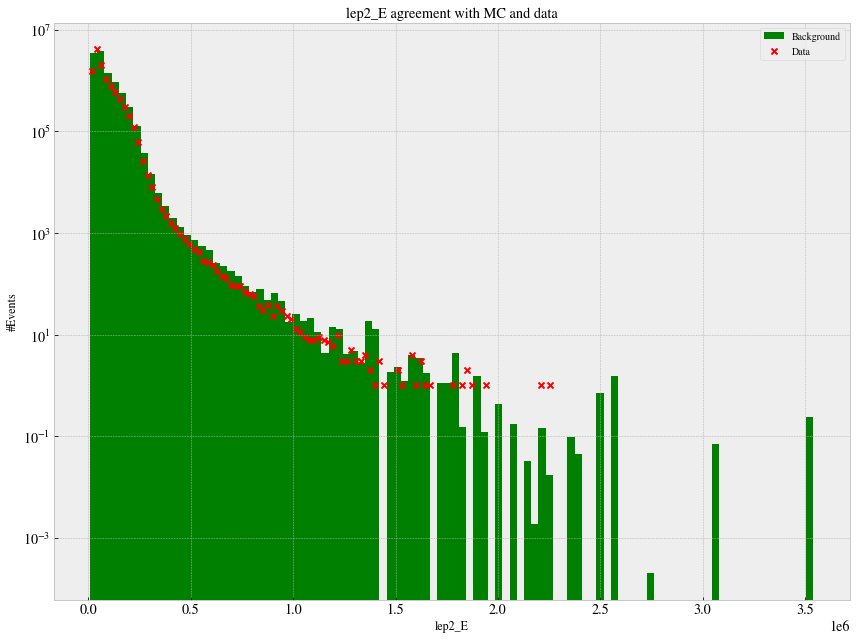

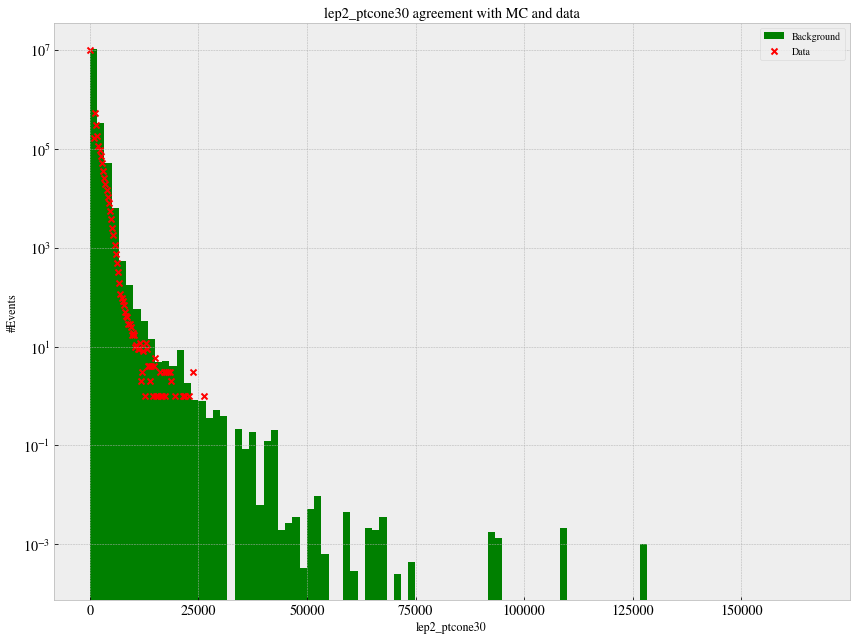

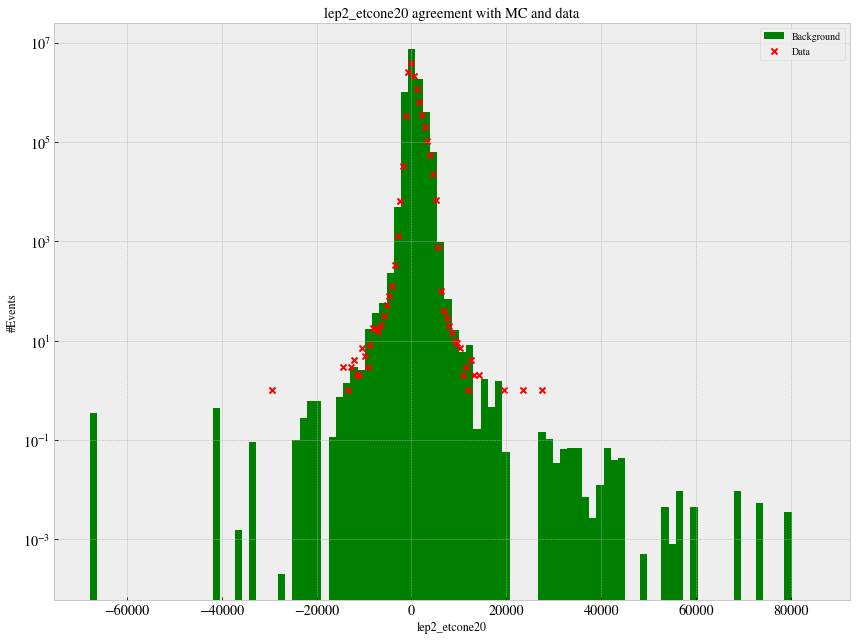

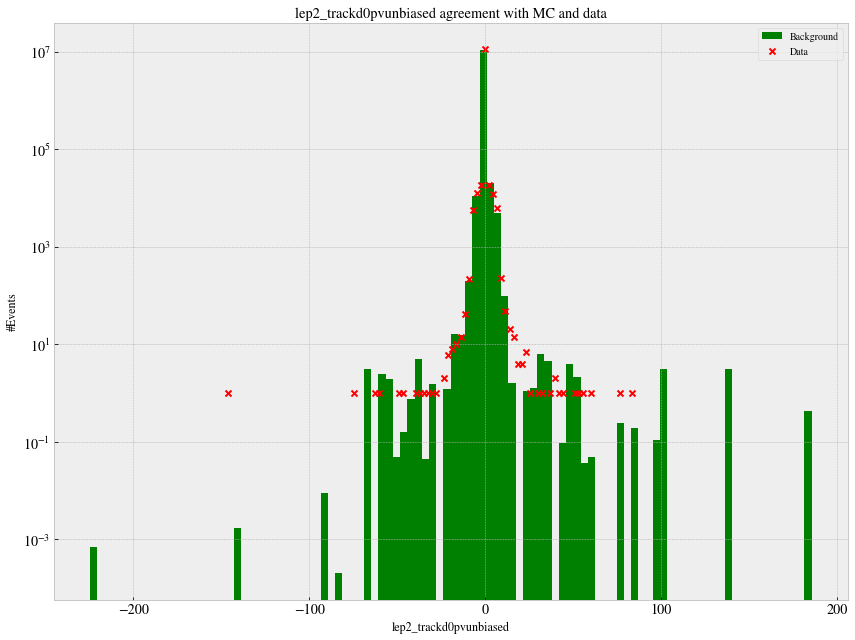

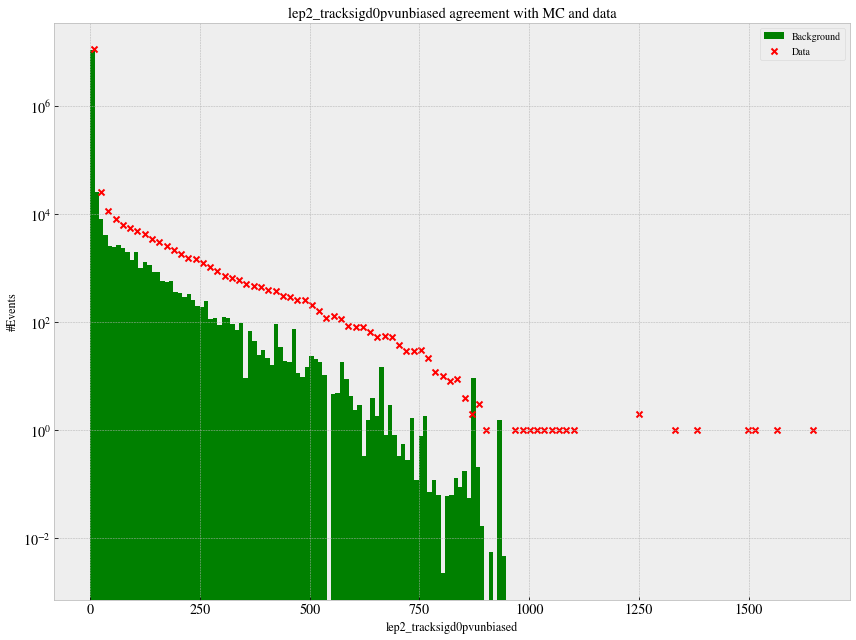

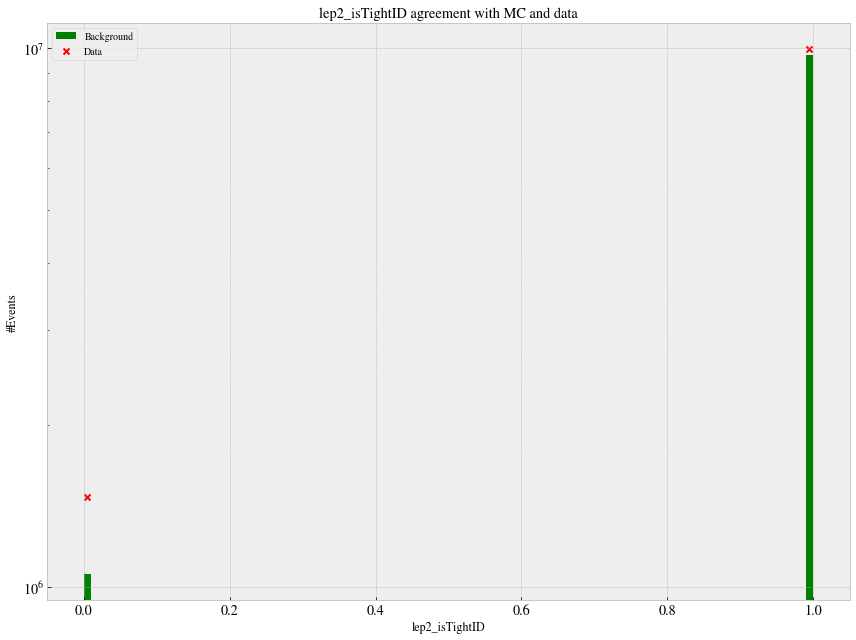

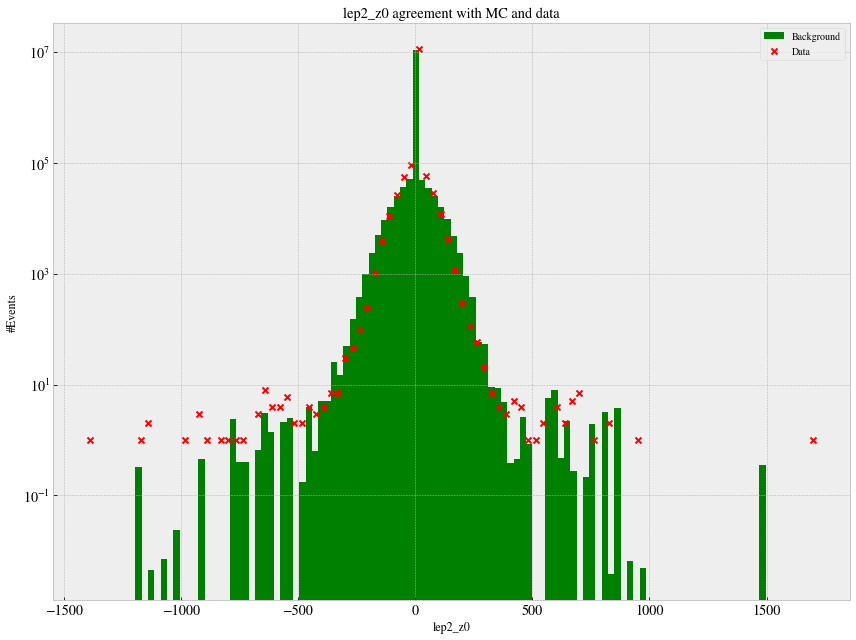

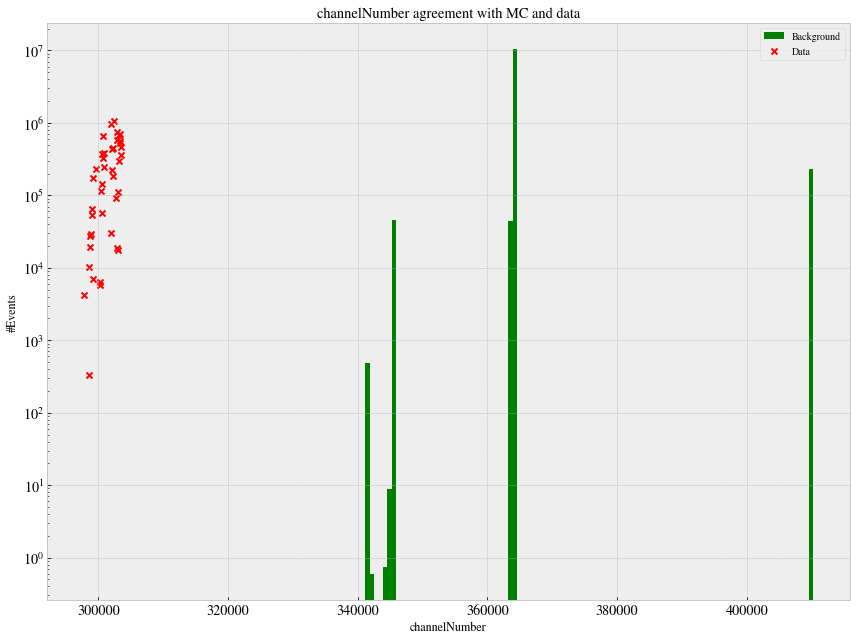

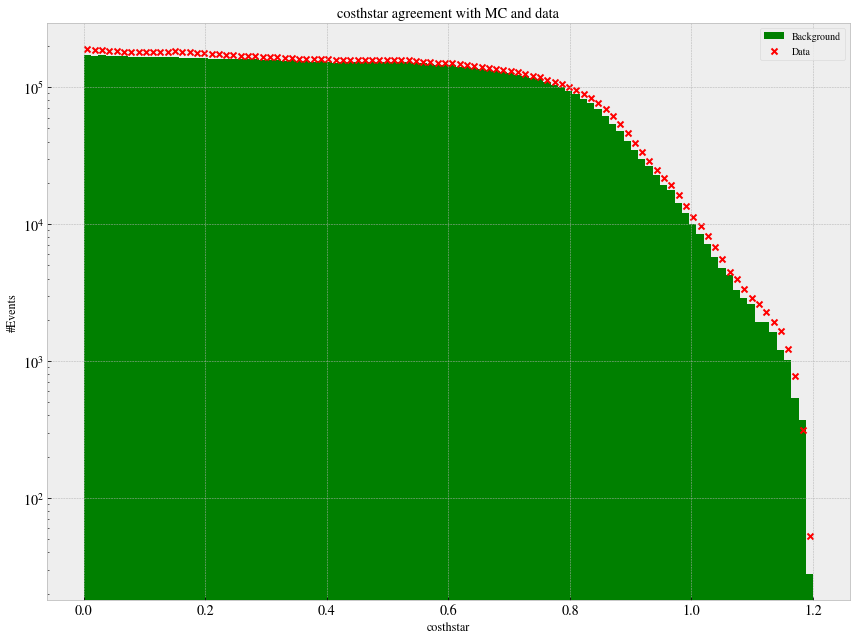

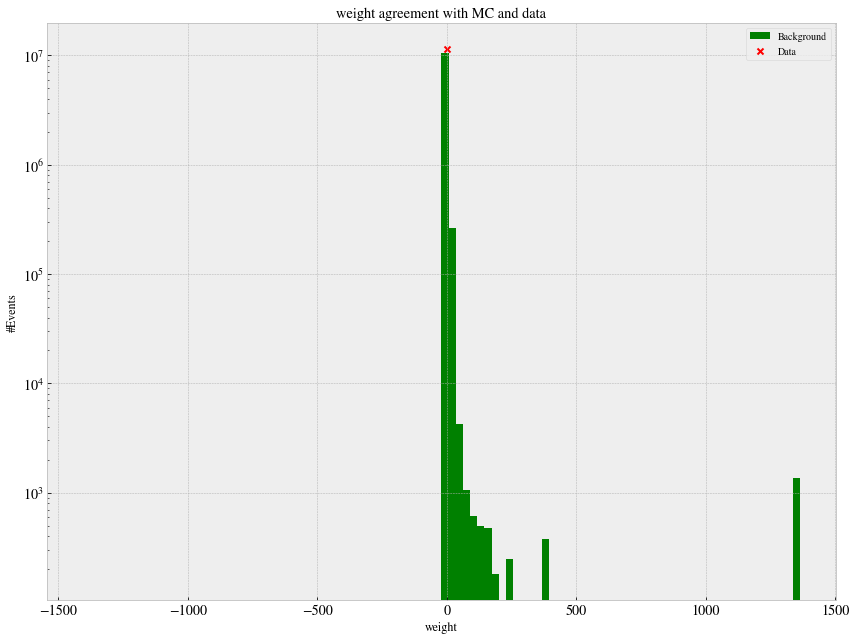

In [14]:
columns = background_mc.columns
weight_histo = background_df["weight"]
for feature in columns:
    
    histo_b = background_df[feature]
    histo_data = data[feature]
    

    plt.rcParams["figure.figsize"] = (12,9)
    fig, ax = plt.subplots()

    N, bins = np.histogram(histo_data, bins = 100)
    x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

    n_bins= 100
    colors = ["green"]
    labels= ["Background"]
    ax.hist(histo_b, 
            n_bins,   
            histtype='bar', 
            color=colors, 
            label=labels, 
            weights=weight_histo
            )

    ax.scatter(x, N, marker="x", color="red",label="Data")

    ax.legend(prop={'size': 10})
    ax.set_title('{} agreement with MC and data'.format(feature))
    ax.set_xlabel('{}'.format(feature))
    ax.set_ylabel('#Events')
    ax.set_yscale('log')
    

    fig.tight_layout()
    #plt.savefig("b_s_recon.pdf")
    plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

b_train_weights = background_df["weight"]
s_test_weights = signal_mc["weight"]

data_weights = data["weight"]

background_df.pop("weight")
signal_mc.pop("weight")
data.pop("weight")

0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
           ... 
11442331    1.0
11442332    1.0
11442333    1.0
11442334    1.0
11442335    1.0
Name: weight, Length: 11442336, dtype: float64

In [18]:
scaler_ae = MinMaxScaler()#StandardScaler()#MinMaxScaler()
background_df = scaler_ae.fit_transform(background_df)                                                                                                                                                                                                                                                                                                                                                                                                                                                   
signal_mc = scaler_ae.transform(signal_mc)
data = scaler_ae.transform(data)

In [19]:
num_col = np.shape(background_df)[1]
print(num_col)

36


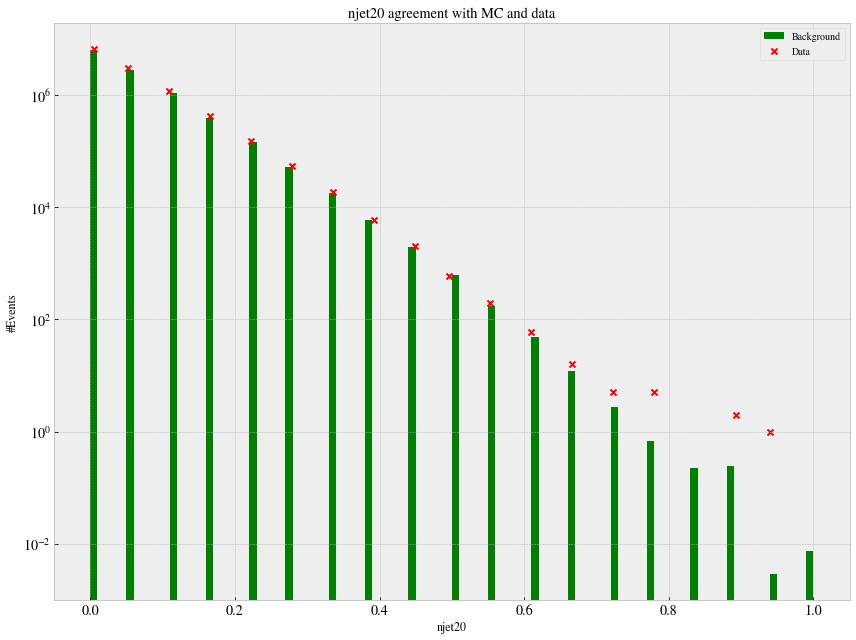

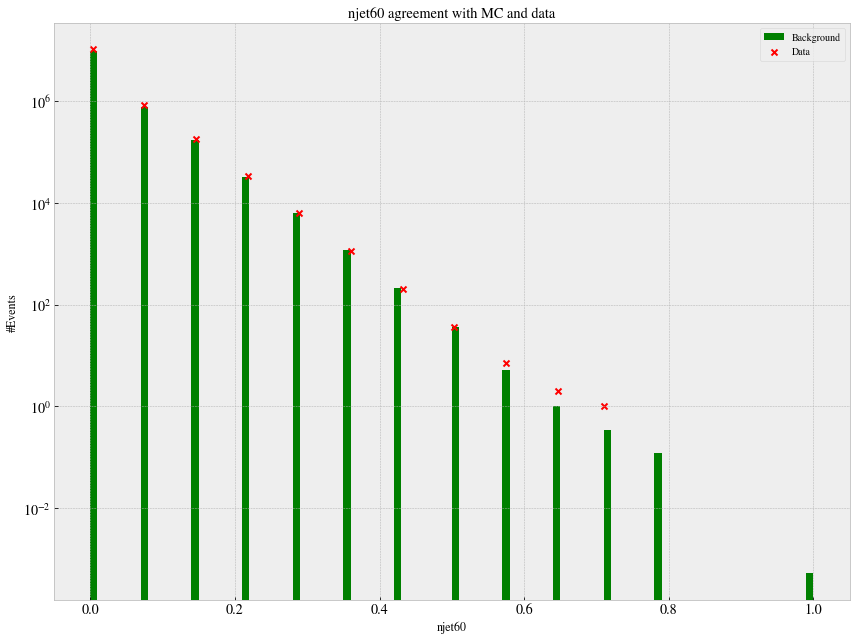

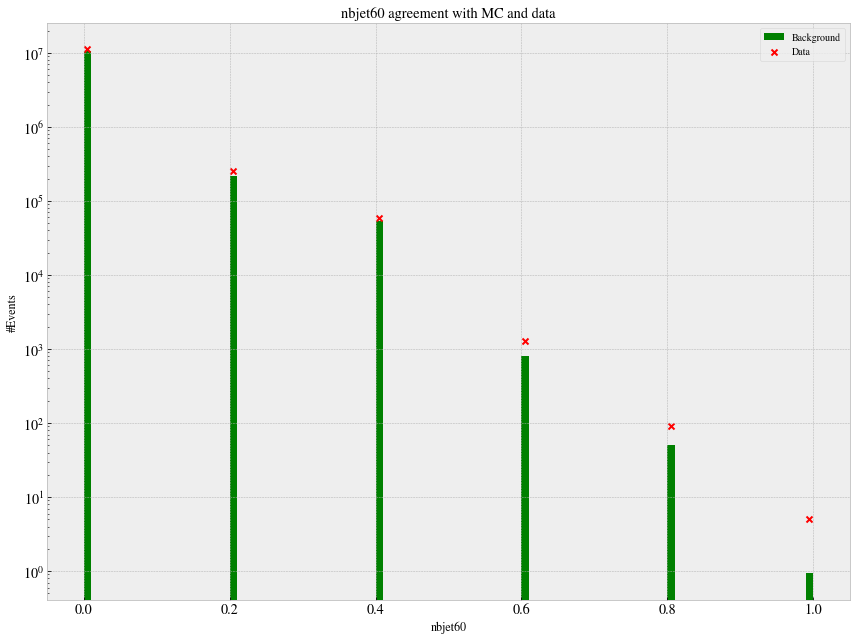

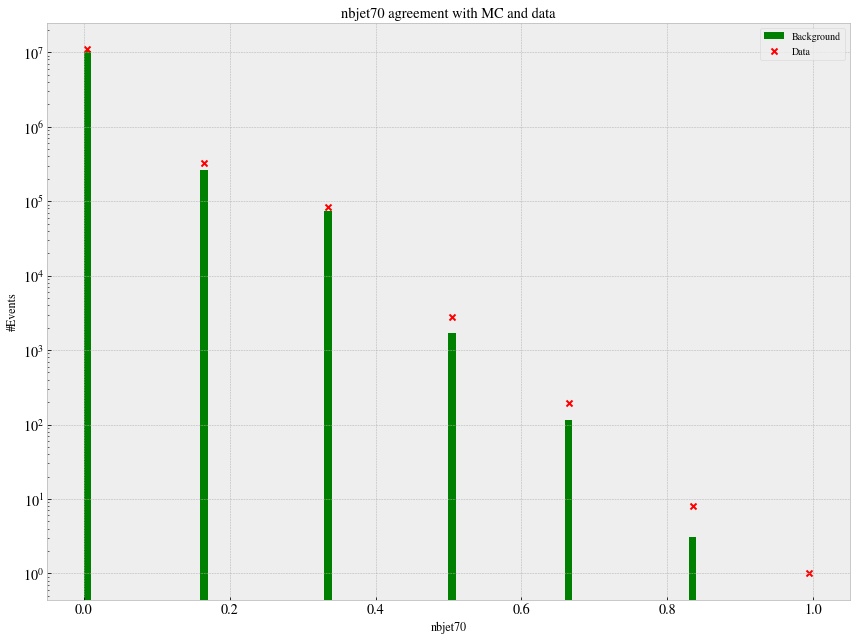

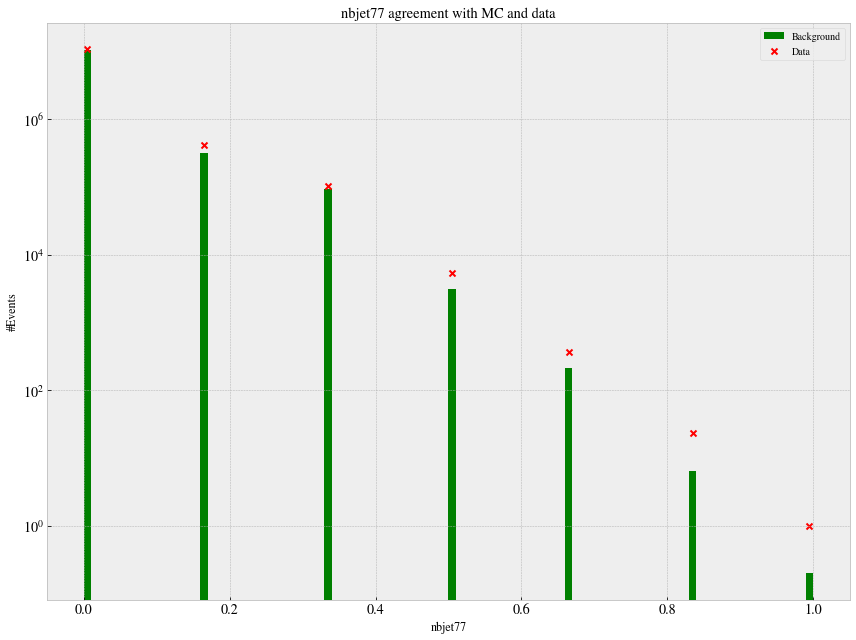

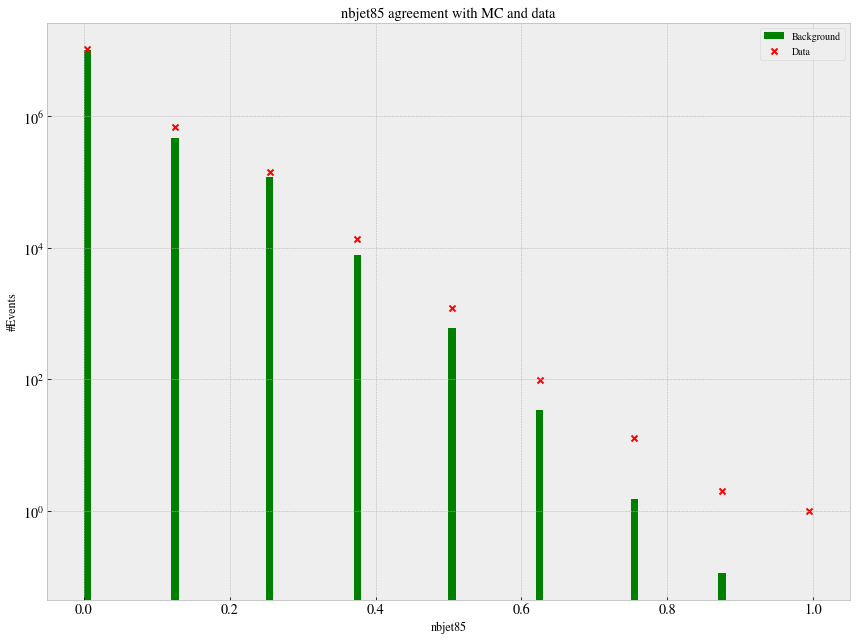

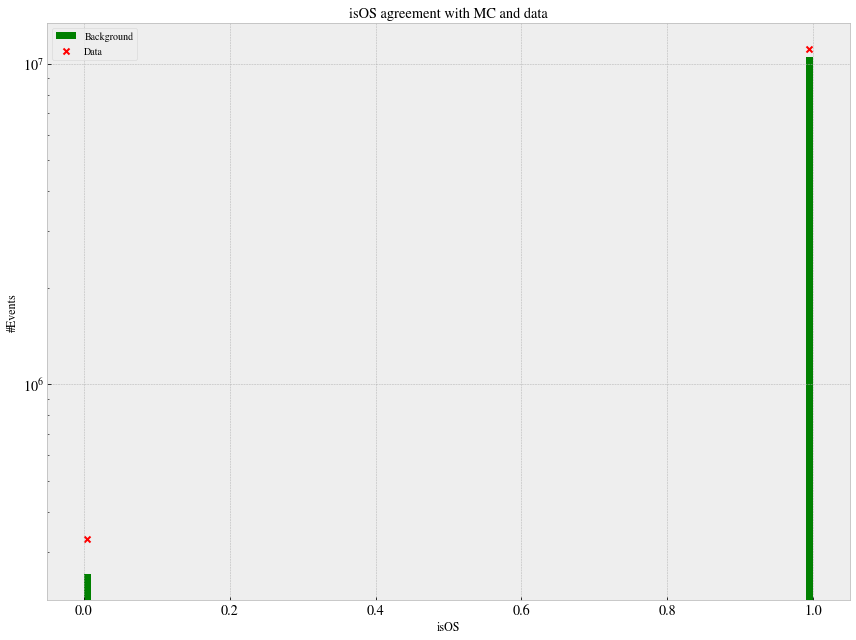

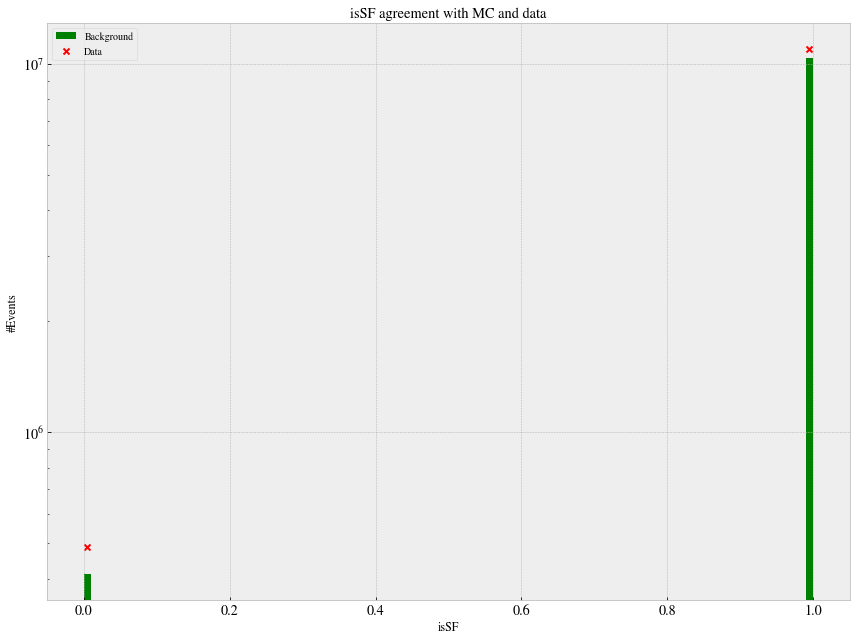

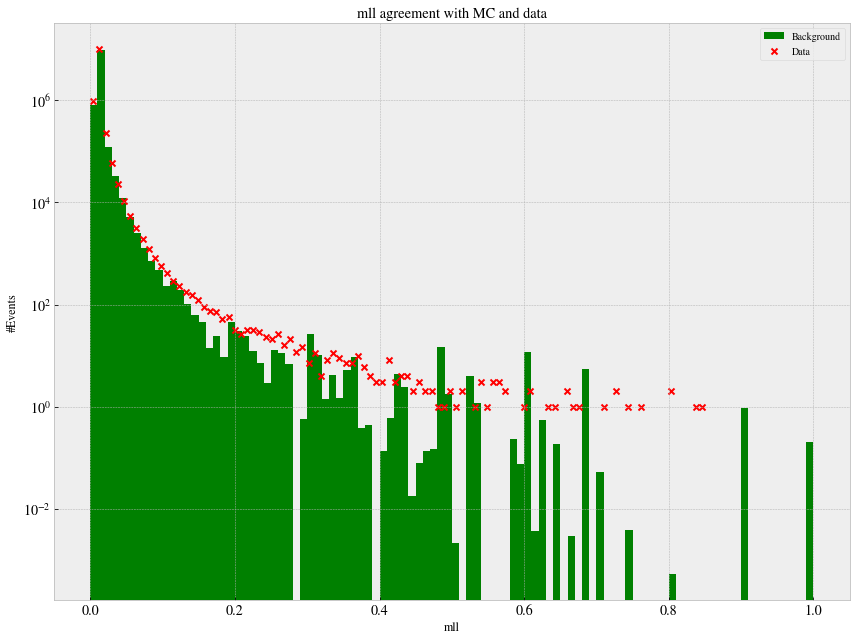

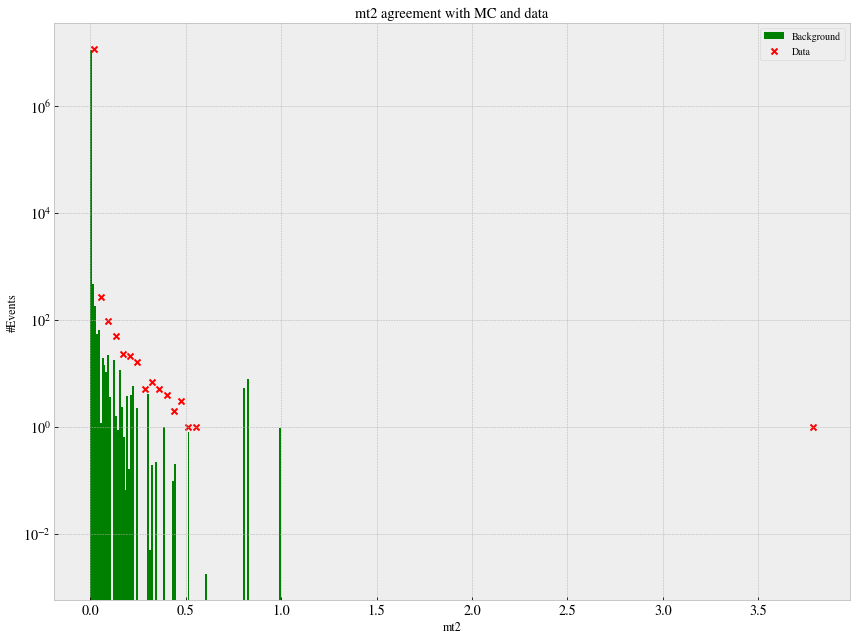

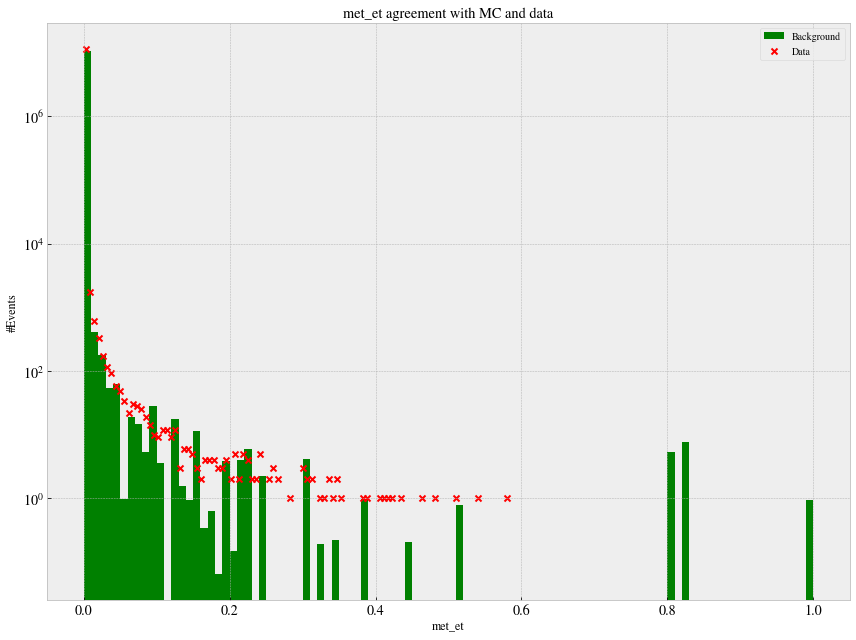

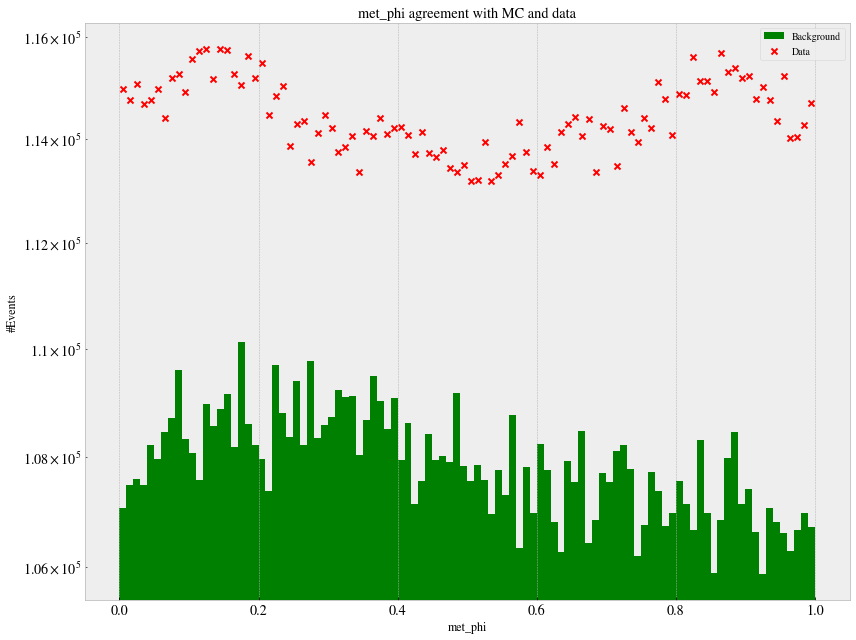

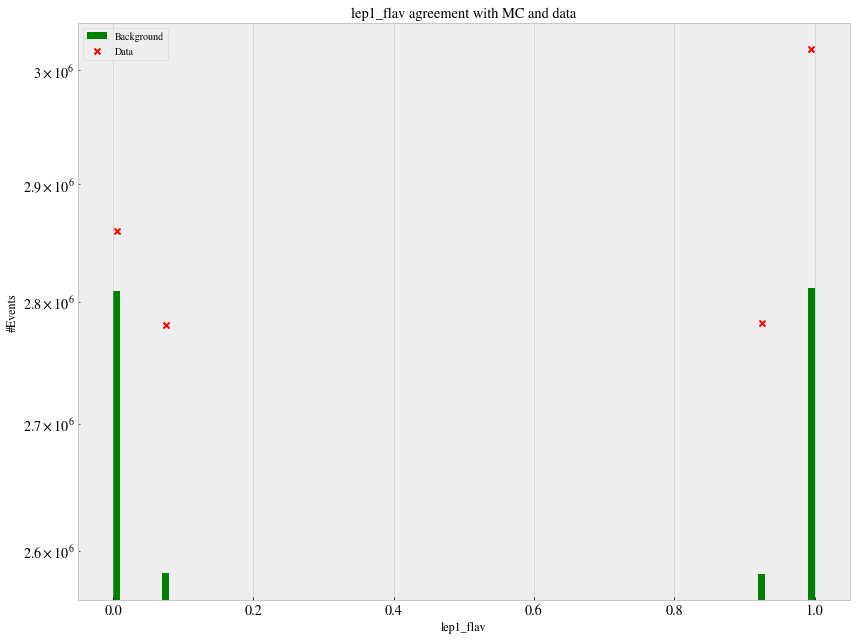

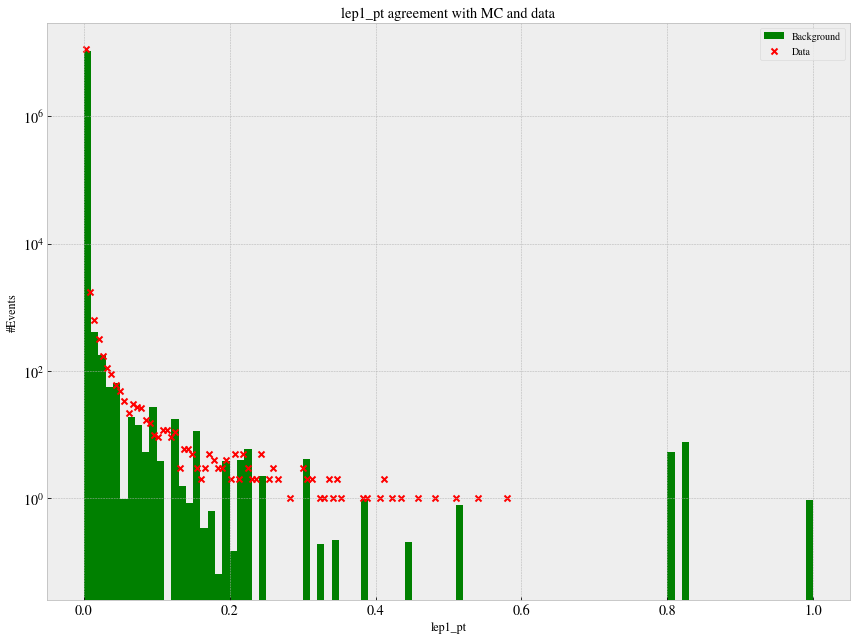

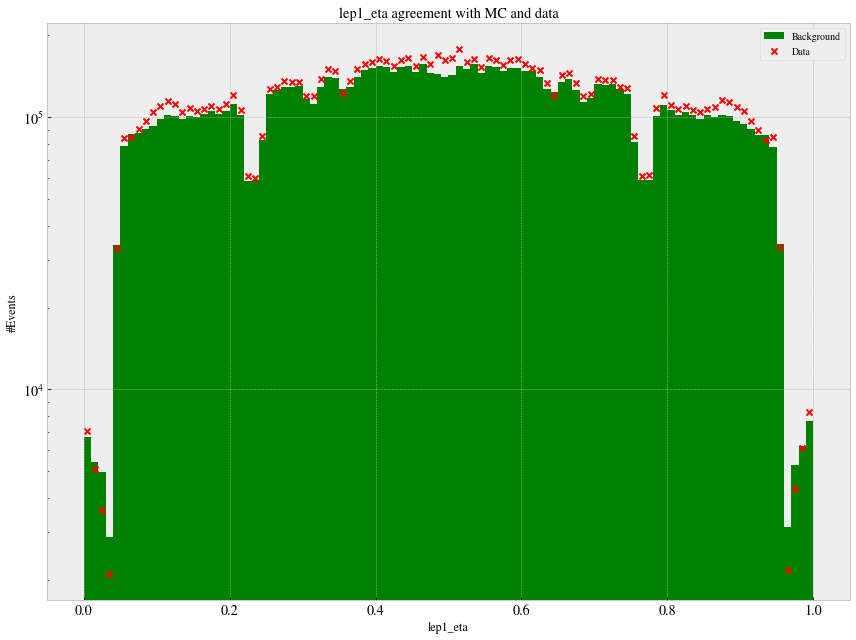

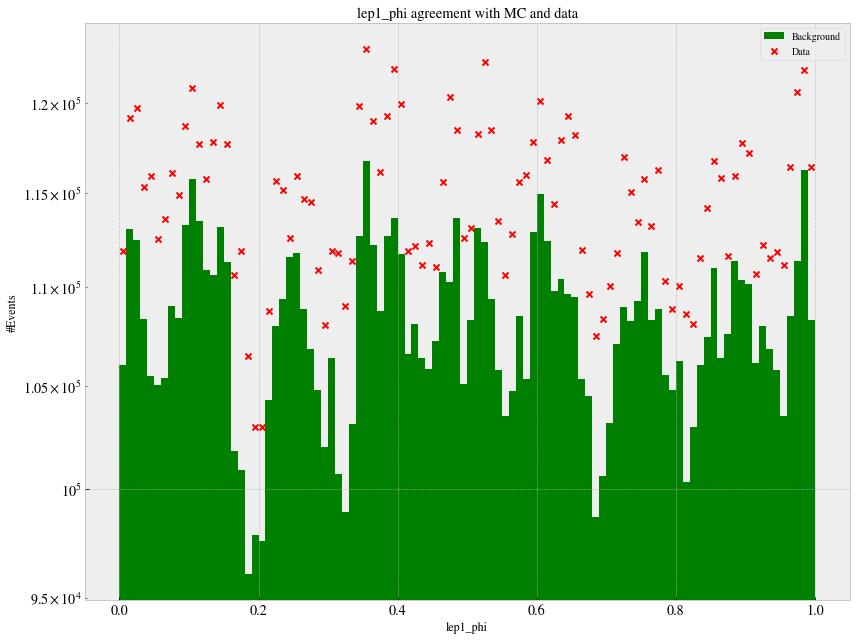

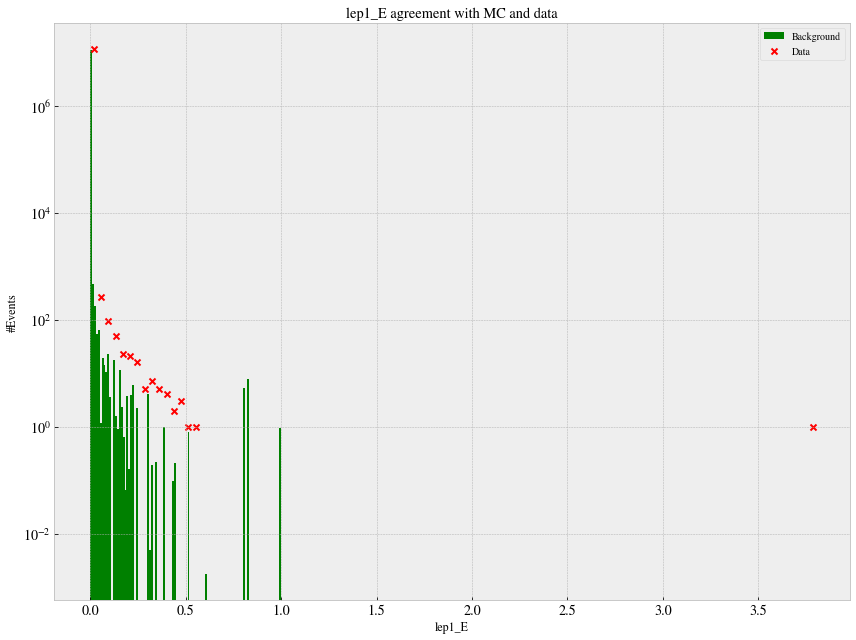

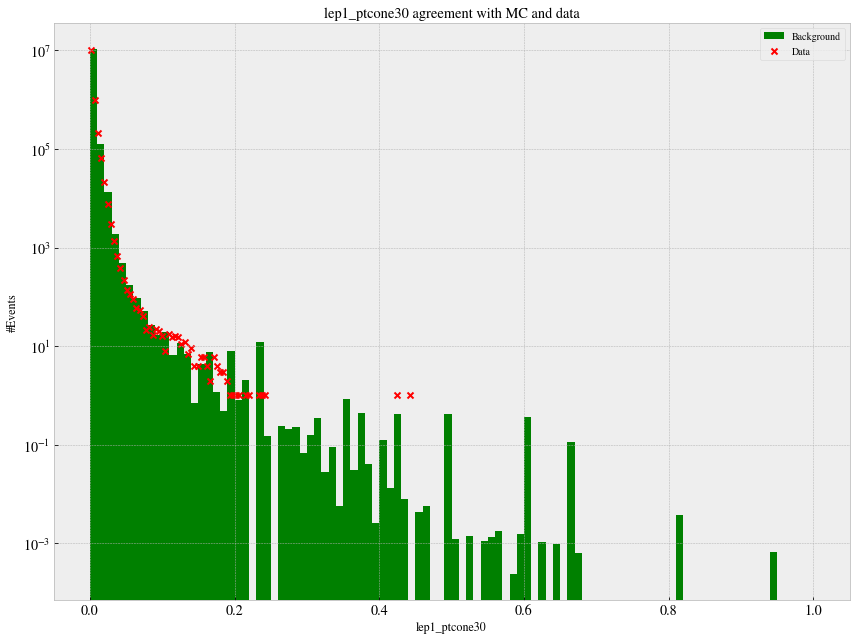

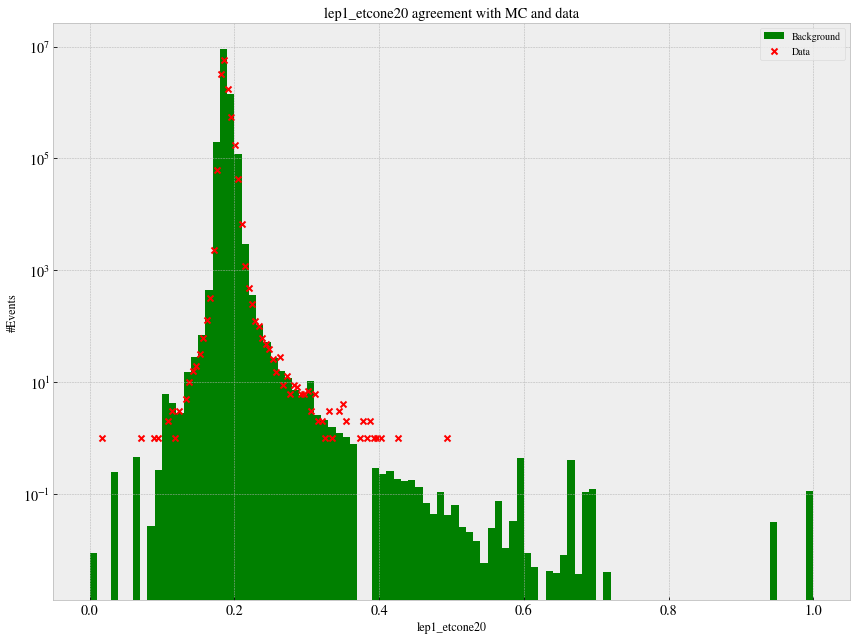

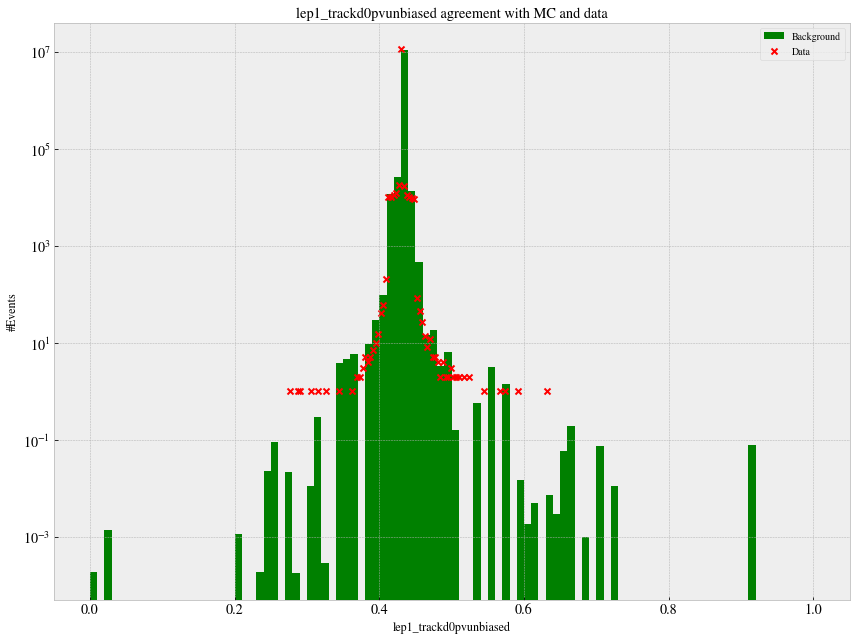

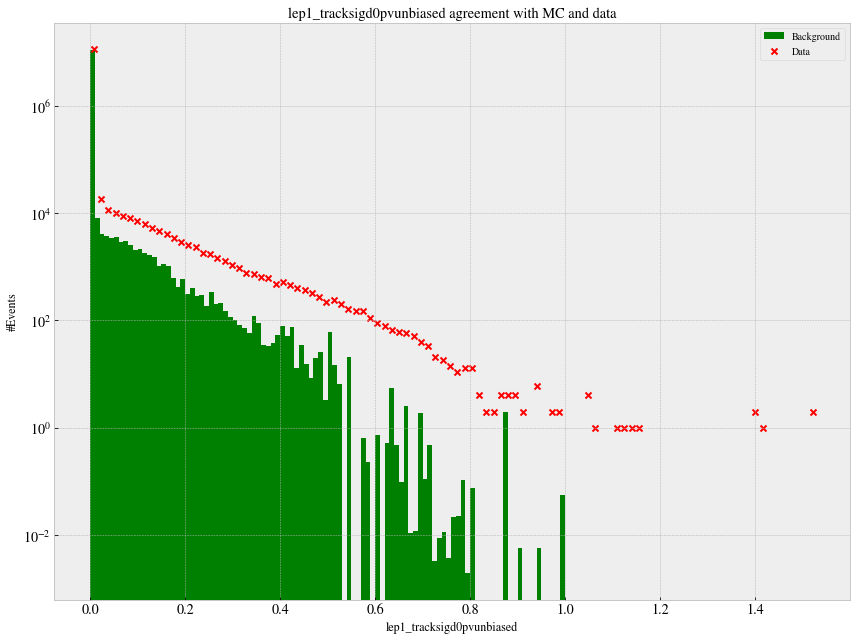

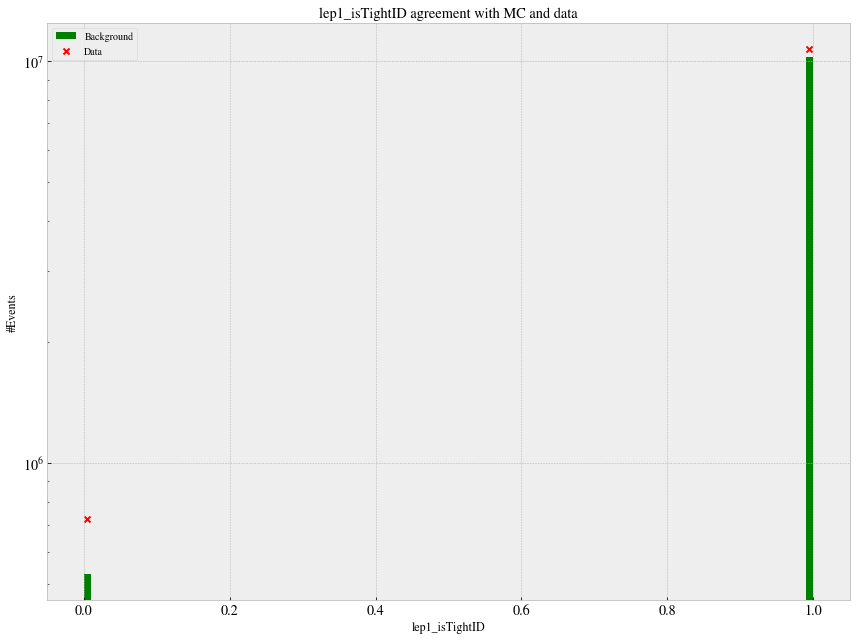

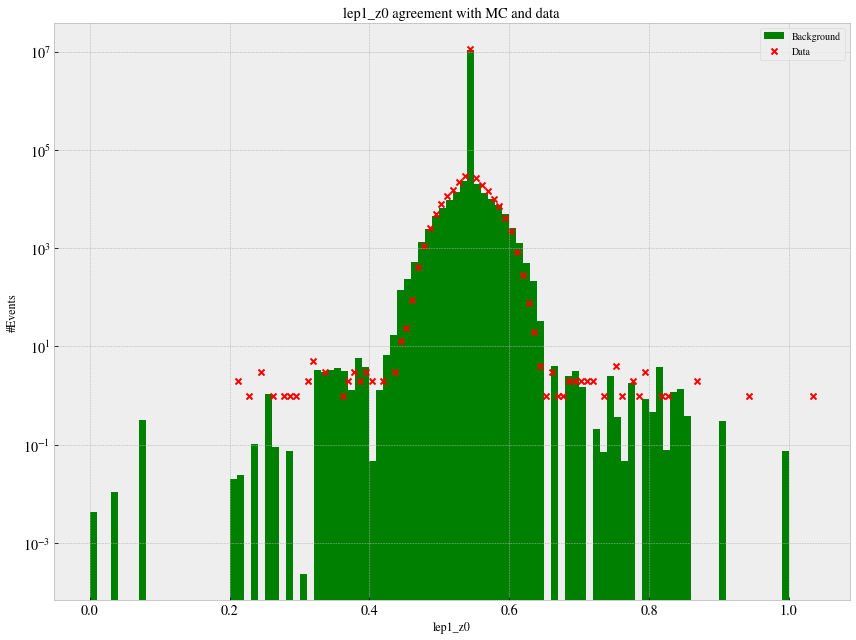

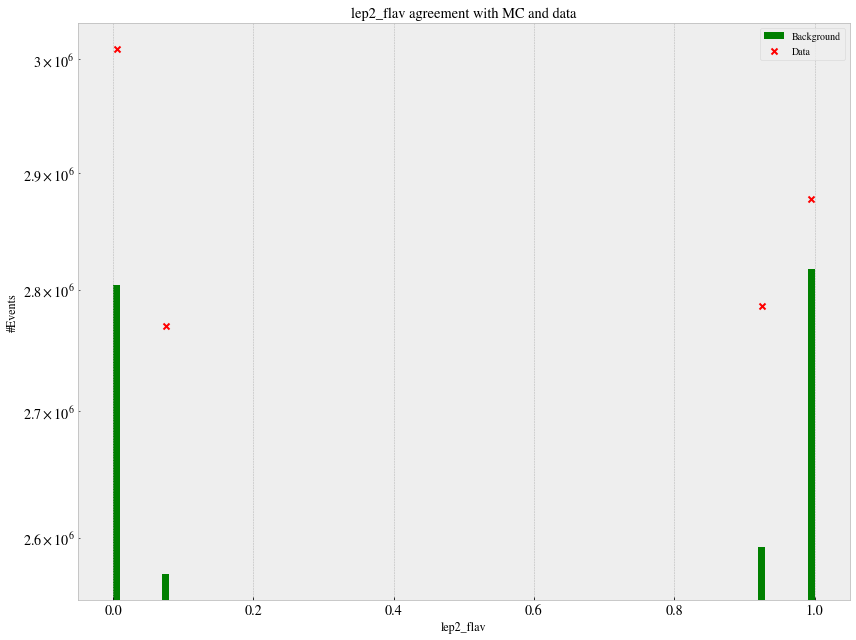

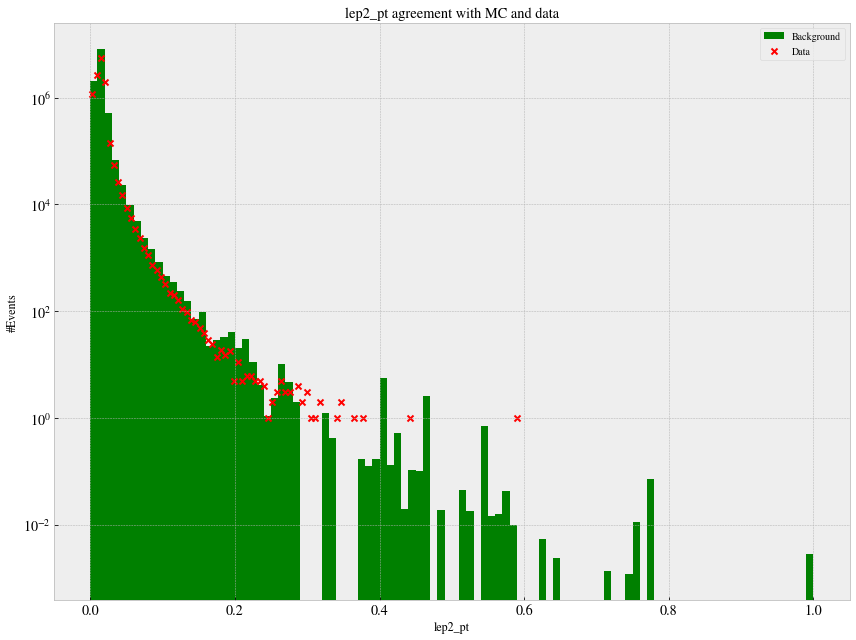

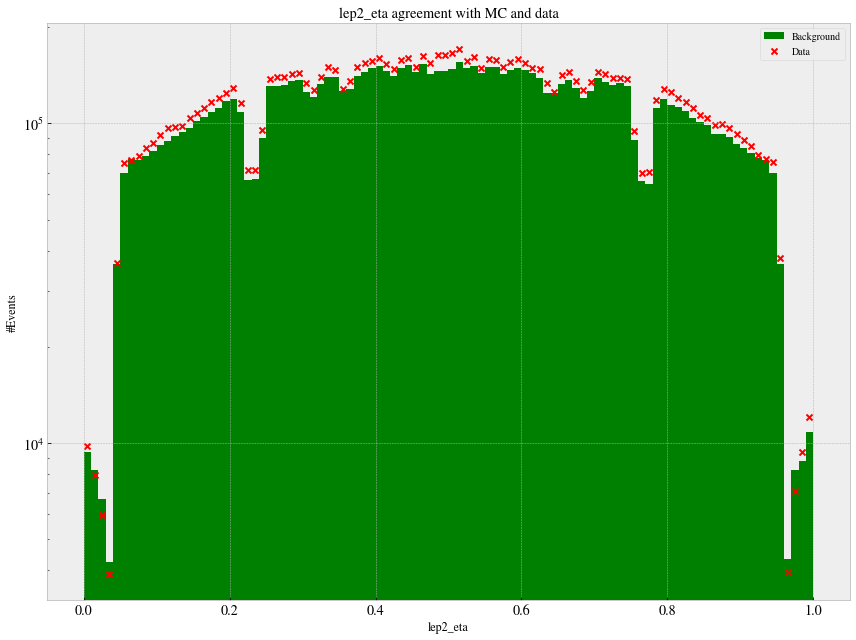

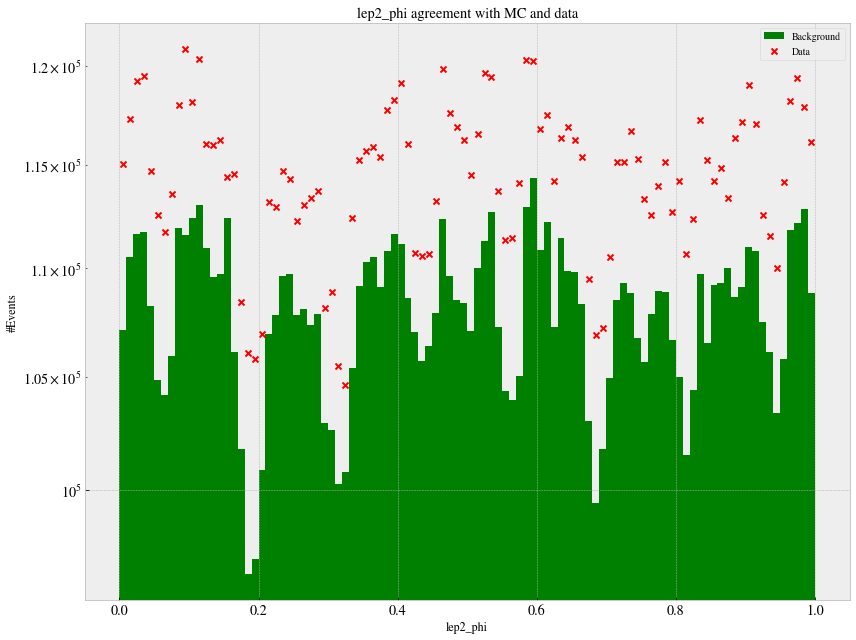

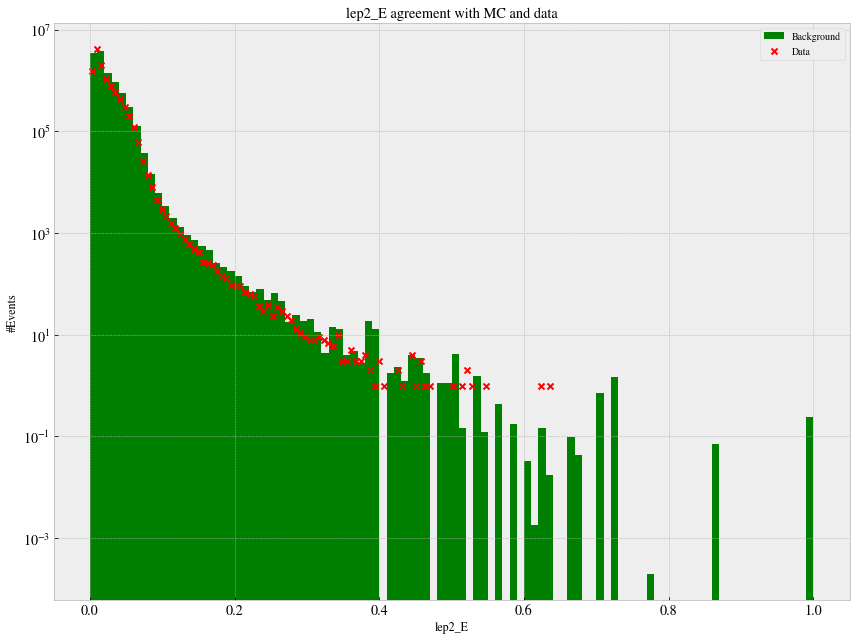

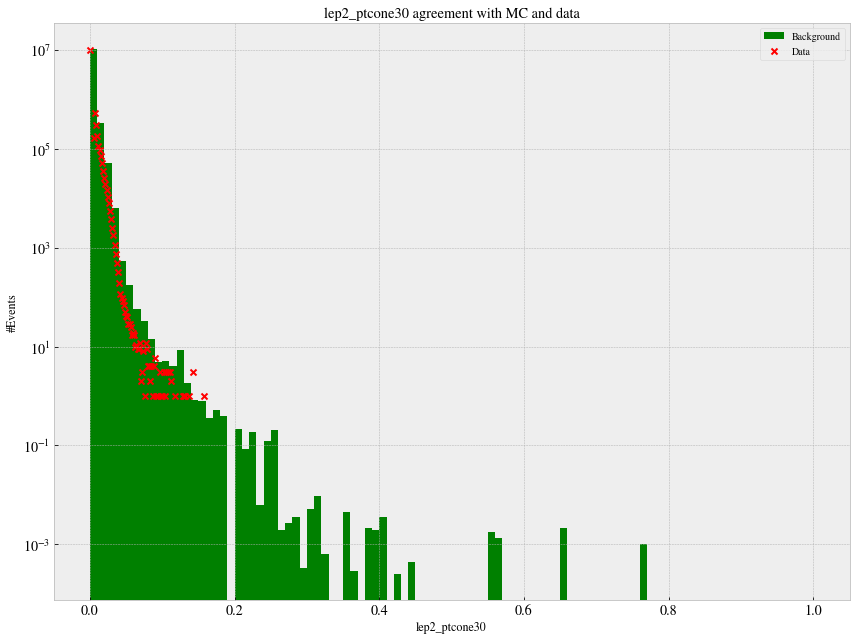

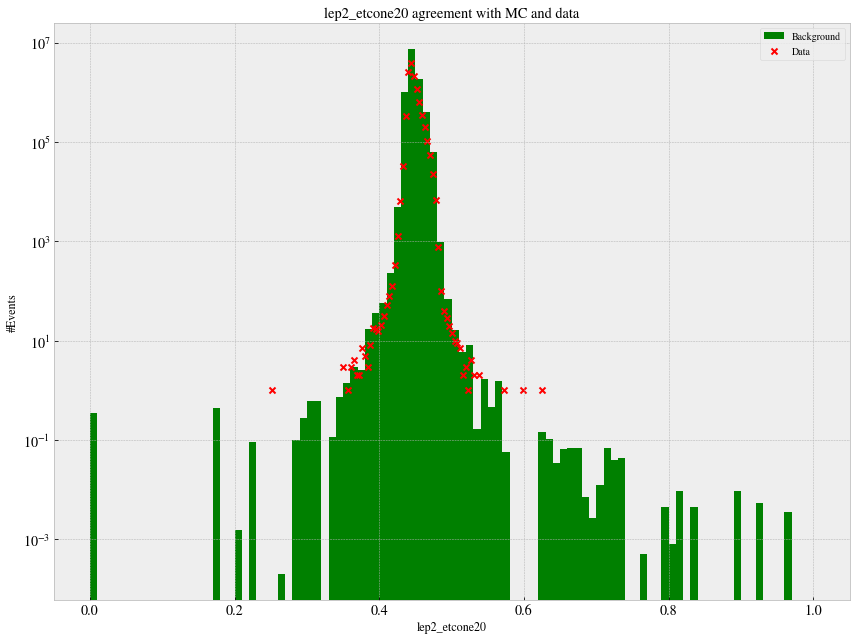

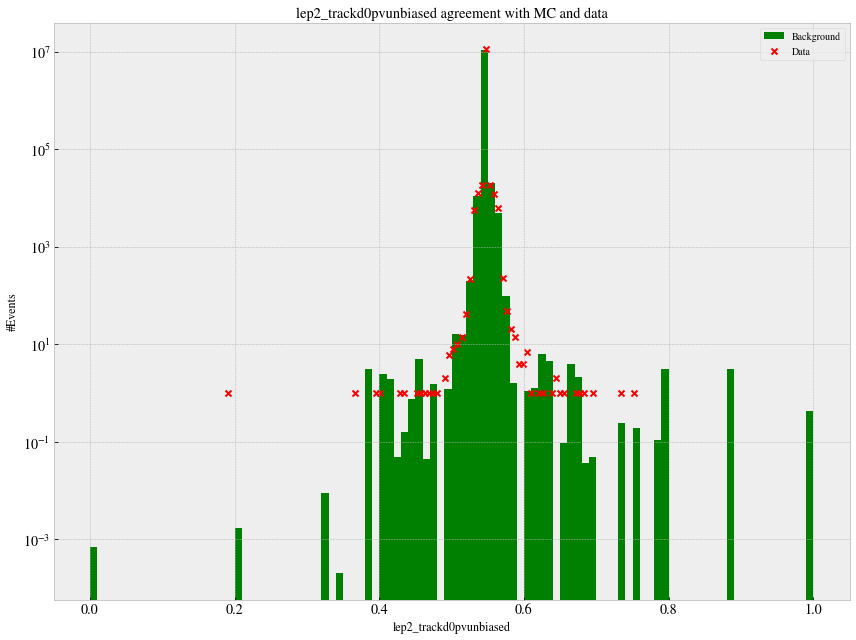

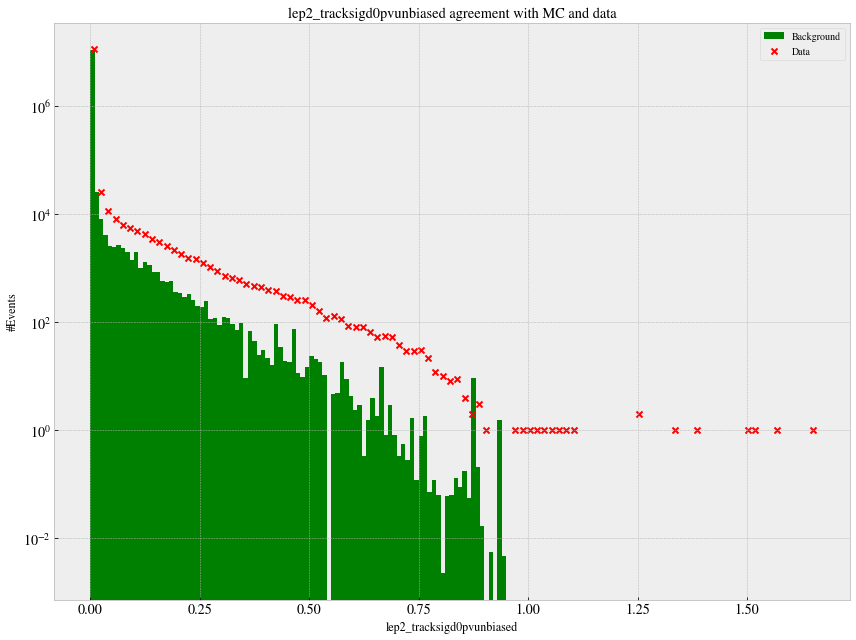

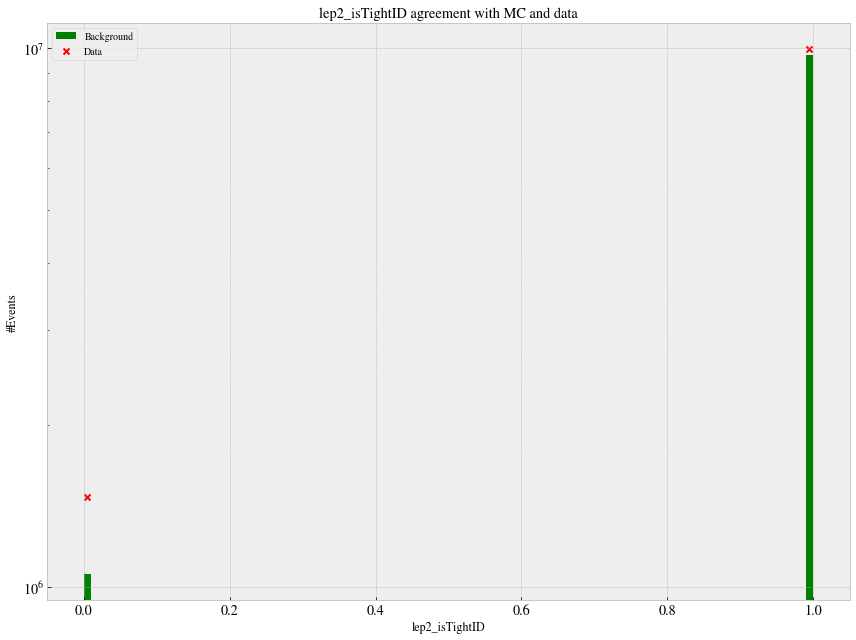

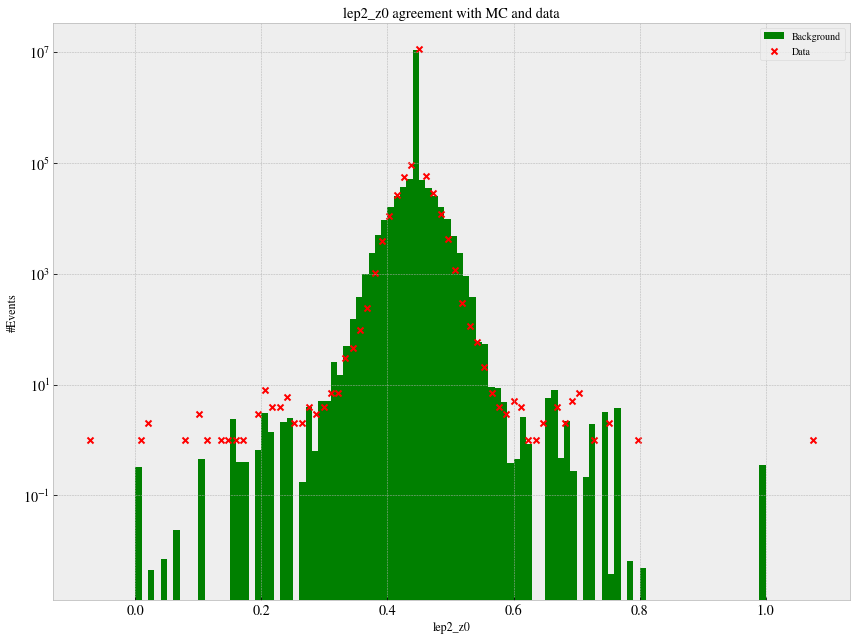

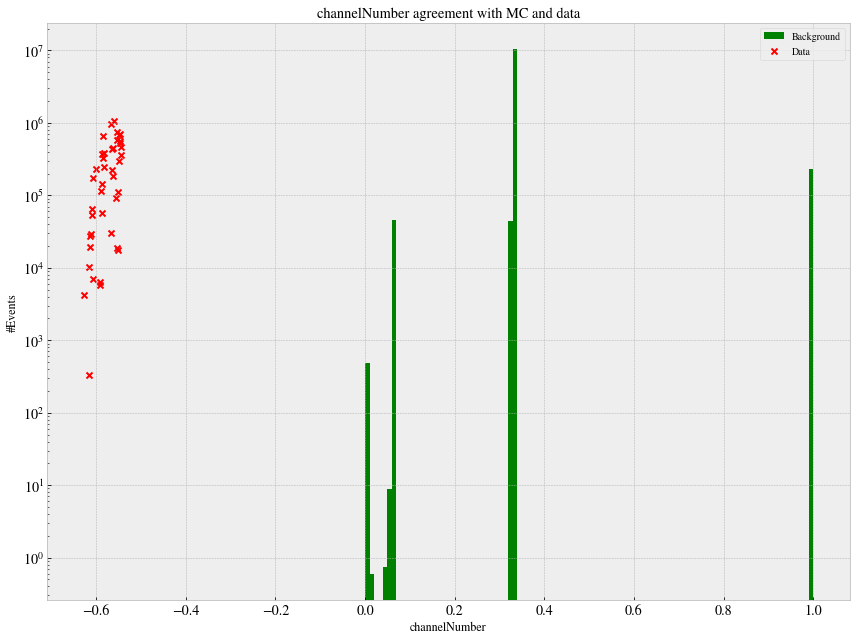

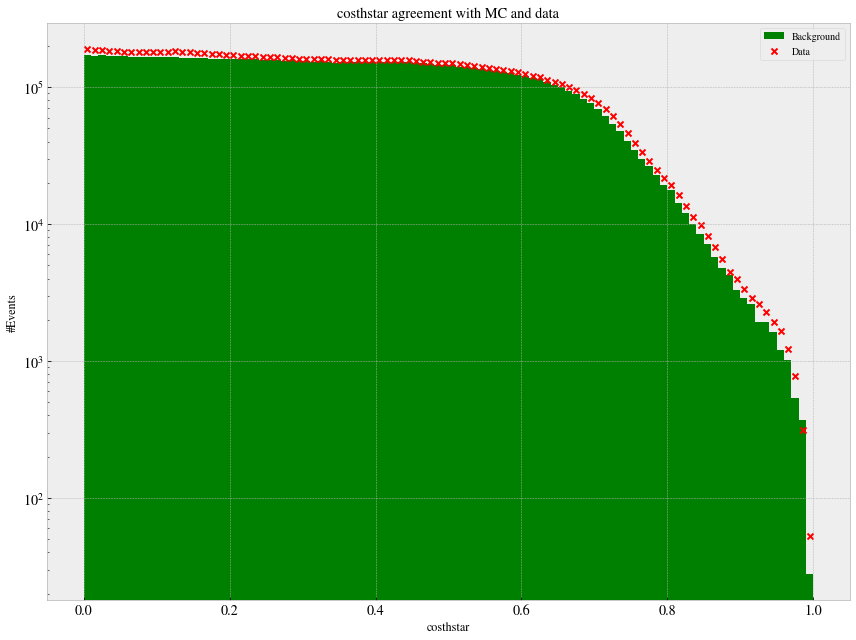

In [23]:
for feature in range(num_col):
    
    histo_b = background_df[:, feature]
    histo_data = data[:, feature]
    
    max_b = np.max(histo_b)
    max_d = np.max(histo_data)
    
    min_b = np.min(histo_b)
    min_d = np.min(histo_data)
    
    mmax = np.max([max_b, max_d])
    mmin = np.min([min_b, min_d])

    plt.rcParams["figure.figsize"] = (12,9)
    fig, ax = plt.subplots()

    N, bins = np.histogram(histo_data, bins = 100)
    x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

    n_bins= 100
    colors = ["green"]
    labels= ["Background"]
    ax.hist(histo_b, 
            n_bins,   
            histtype='bar', 
            color=colors, 
            label=labels, 
            weights=weight_histo
            )

    ax.scatter(x, N, marker="x", color="red",label="Data")

    ax.legend(prop={'size': 10})
    ax.set_title('{} agreement with MC and data'.format(columns[feature]))
    ax.set_xlabel('{}'.format(columns[feature]))
    ax.set_ylabel('#Events')
    
    
    #ax.set_ylim([mmin, mmax])
    #if mmin >= 0:
    ax.set_yscale('log')
    fig.tight_layout()
    #plt.savefig("b_s_recon.pdf")
    plt.show()